In [1]:
!pip install -q openmeteo-requests
!pip install -q requests-cache retry-requests numpy pandas

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 11.9338,
	"longitude": 79.8298,
	"start_date": "2019-01-01",
	"end_date": "2024-01-01",
	"daily": ["weather_code", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "apparent_temperature_max", "apparent_temperature_min", "apparent_temperature_mean", "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum", "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum", "et0_fao_evapotranspiration"],
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_weather_code = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(2).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(3).ValuesAsNumpy()
daily_apparent_temperature_max = daily.Variables(4).ValuesAsNumpy()
daily_apparent_temperature_min = daily.Variables(5).ValuesAsNumpy()
daily_apparent_temperature_mean = daily.Variables(6).ValuesAsNumpy()
daily_sunrise = daily.Variables(7).ValuesAsNumpy()
daily_sunset = daily.Variables(8).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(9).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(10).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(11).ValuesAsNumpy()
daily_rain_sum = daily.Variables(12).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(13).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(14).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(15).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(16).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(17).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(18).ValuesAsNumpy()
daily_et0_fao_evapotranspiration = daily.Variables(19).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["weather_code"] = daily_weather_code
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["apparent_temperature_max"] = daily_apparent_temperature_max
daily_data["apparent_temperature_min"] = daily_apparent_temperature_min
daily_data["apparent_temperature_mean"] = daily_apparent_temperature_mean
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["precipitation_hours"] = daily_precipitation_hours
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum
daily_data["et0_fao_evapotranspiration"] = daily_et0_fao_evapotranspiration
# daily_data["sunrise"] = daily_sunrise
# daily_data["sunset"] = daily_sunset
# daily_data["rain_sum"] = daily_rain_sum
# daily_data["snowfall_sum"] = daily_snowfall_sum

df = pd.DataFrame(data = daily_data)
df1=df

Coordinates 11.915641784667969°N 79.82959747314453°E
Elevation 8.0 m asl
Timezone b'Asia/Kolkata' b'IST'
Timezone difference to GMT+0 19800 s


In [5]:
#Historical Data
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 11.9338,
	"longitude": 79.8298,
	"start_date": "2014-01-01",
	"end_date": "2019-01-01",
	"daily": ["weather_code", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "apparent_temperature_max", "apparent_temperature_min", "apparent_temperature_mean", "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum", "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum", "et0_fao_evapotranspiration"],
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_weather_code = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(2).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(3).ValuesAsNumpy()
daily_apparent_temperature_max = daily.Variables(4).ValuesAsNumpy()
daily_apparent_temperature_min = daily.Variables(5).ValuesAsNumpy()
daily_apparent_temperature_mean = daily.Variables(6).ValuesAsNumpy()
daily_sunrise = daily.Variables(7).ValuesAsNumpy()
daily_sunset = daily.Variables(8).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(9).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(10).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(11).ValuesAsNumpy()
daily_rain_sum = daily.Variables(12).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(13).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(14).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(15).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(16).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(17).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(18).ValuesAsNumpy()
daily_et0_fao_evapotranspiration = daily.Variables(19).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["weather_code"] = daily_weather_code
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["apparent_temperature_max"] = daily_apparent_temperature_max
daily_data["apparent_temperature_min"] = daily_apparent_temperature_min
daily_data["apparent_temperature_mean"] = daily_apparent_temperature_mean
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["precipitation_hours"] = daily_precipitation_hours
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum
daily_data["et0_fao_evapotranspiration"] = daily_et0_fao_evapotranspiration
# daily_data["sunrise"] = daily_sunrise
# daily_data["sunset"] = daily_sunset
# daily_data["rain_sum"] = daily_rain_sum
# daily_data["snowfall_sum"] = daily_snowfall_sum

historical_df = pd.DataFrame(data = daily_data)

Coordinates 11.915641784667969°N 79.82959747314453°E
Elevation 8.0 m asl
Timezone b'Asia/Kolkata' b'IST'
Timezone difference to GMT+0 19800 s


In [8]:
# Display the first few rows of the DataFrame
df.head(10)

date  weather_code  temperature_2m_max  \
0 2018-12-31 18:30:00+00:00           2.0           26.043499   
1 2019-01-01 18:30:00+00:00           3.0           26.243500   
2 2019-01-02 18:30:00+00:00           1.0           27.093500   
3 2019-01-03 18:30:00+00:00           2.0           26.943501   
4 2019-01-04 18:30:00+00:00           2.0           27.093500   
5 2019-01-05 18:30:00+00:00          51.0           27.143499   
6 2019-01-06 18:30:00+00:00           3.0           27.443501   
7 2019-01-07 18:30:00+00:00           0.0           27.843500   
8 2019-01-08 18:30:00+00:00           3.0           26.793499   
9 2019-01-09 18:30:00+00:00           2.0           27.043499   

   temperature_2m_min  temperature_2m_mean  apparent_temperature_max  \
0           20.743500            23.164331                 26.937487   
1           21.243500            23.678915                 27.103737   
2           20.893499            23.841415                 29.158646   
3           21.193501            23.745584                 28.075455   
4           19.593500            23.606001                 28.319530   
5           20.493500            23.633085                 28.385559   
6           21.243500            24.331001                 30.269966   
7           20.443501            23.978914                 30.898281   
8           19.093500            23.278915                 30.177654   
9           20.893499            24.168497                 28.737904   

   apparent_temperature_min  apparent_temperature_mean  daylight_duration  \
0                 21.131121                  23.483252       41176.628906   
1                 21.969086                  24.363600       41186.519531   
2                 21.729765                  24.955492       41197.355469   
3                 22.577934                  24.951340       41209.121094   
4                 20.623617                  24.552383       41221.777344   
5                 20.813540                  24.420305       41235.300781   
6                 22.443846                  25.998213       41249.671875   
7                 22.435093                  26.014336       41264.859375   
8                 21.043648                  25.445169       41280.847656   
9                 23.331457                  25.703978       41297.597656   

   sunshine_duration  precipitation_sum  precipitation_hours  \
0       37854.804688                0.0                  0.0   
1       36000.000000                0.0                  0.0   
2       38170.855469                0.0                  0.0   
3       36952.109375                0.0                  0.0   
4       36573.257812                0.0                  0.0   
5       33266.976562                0.2                  2.0   
6       36824.781250                0.0                  0.0   
7       38075.199219                0.0                  0.0   
8       36700.222656                0.0                  0.0   
9       37314.878906                0.0                  0.0   

   wind_speed_10m_max  wind_gusts_10m_max  wind_direction_10m_dominant  \
0           24.014996           46.439999                    25.063423   
1           22.453150           45.360001                    20.790485   
2           20.380579           38.880001                    25.384989   
3           22.401142           45.000000                    21.403809   
4           23.051247           46.439999                    22.323288   
5           21.758419           44.279999                    21.511097   
6           17.727943           36.719997                    30.469027   
7           18.723461           36.360001                    27.684263   
8           15.790833           31.680000                    32.812328   
9           22.104116           44.279999                    40.715401   

   shortwave_radiation_sum  et0_fao_evapotranspiration  
0                19.650000                    4.420719  
1                17.600000      

In [9]:
# Check the dimensions of the DataFrame
print("Dimensions of the DataFrame:", df.shape)

Dimensions of the DataFrame: (1827, 17)


In [10]:
# Summary statistics
df.describe()

weather_code  temperature_2m_max  temperature_2m_min  \
count   1827.000000         1827.000000         1827.000000   
mean      38.229340           31.111589           25.019718   
std       25.380144            2.916245            2.080616   
min        0.000000           22.793499           18.743500   
25%        3.000000           28.618500           23.693501   
50%       51.000000           30.993500           25.143499   
75%       55.000000           33.243500           26.543499   
max       65.000000           40.893501           30.343500   

       temperature_2m_mean  apparent_temperature_max  \
count          1827.000000               1827.000000   
mean             27.875299                 35.826160   
std               2.129870                  3.863386   
min              21.512251                 21.934410   
25%              26.003917                 32.602362   
50%              27.945585                 36.528301   
75%              29.471627                 39.035099   
max              34.316418                 45.091496   

       apparent_temperature_min  apparent_temperature_mean  daylight_duration  \
count               1827.000000                1827.000000        1827.000000   
mean                  28.739586                  31.766630       43666.457031   
std                    2.849906                   2.905828        1742.815063   
min                   17.928041                  20.176867       41127.789062   
25%                   27.024554                  29.385358       41966.300781   
50%                   29.297642                  32.594494       43684.437500   
75%                   30.726292                  34.007439       45371.671875   
max                   35.211502                  37.629292       46166.968750   

       sunshine_duration  precipitation_sum  precipitation_hours  \
count        1827.000000        1827.000000          1827.000000   
mean        35266.250000           3.550848             5.059660   
std          9218.454102           9.312374             6.245458   
min             0.000000           0.000000             0.000000   
25%         35299.451172           0.000000             0.000000   
50%         38631.699219           0.500000             3.000000   
75%         40336.876953           2.700000             7.000000   
max         42446.695312         179.500015            24.000000   

       wind_speed_10m_max  wind_gusts_10m_max  wind_direction_10m_dominant  \
count         1827.000000         1827.000000                  1827.000000   
mean            19.367350           39.478222                   138.829865   
std              4.375907            7.508636                    78.172516   
min              9.220499           20.880001                     0.634215   
25%             16.311613           34.560001                    56.005873   
50%             19.080000           38.880001                   154.520401   
75%             22.104116           44.279999                   198.252563   
max             48.610664           92.159996                   359.999969   

       shortwave_radiation_sum  et0_fao_evapotranspiration  
count              1827.000000                 1827.000000  
mean                 19.619436                    4.629675  
std                   4.429245                    1.173263  
min                   1.320000                    0.682895  
25%                  17.515000                    3.953332  
50%                  20.660000                    4.754852  
75%                  22.830000                    5.405808  
max                  26.520000                    8.345245

In [11]:
# Data types
print(df.dtypes)

# Missing values
print("Missing values:\n", df.isnull().sum())

date                           datetime64[ns, UTC]
weather_code                               float32
temperature_2m_max                         float32
temperature_2m_min                         float32
temperature_2m_mean                        float32
apparent_temperature_max                   float32
apparent_temperature_min                   float32
apparent_temperature_mean                  float32
daylight_duration                          float32
sunshine_duration                          float32
precipitation_sum                          float32
precipitation_hours                        float32
wind_speed_10m_max                         float32
wind_gusts_10m_max                         float32
wind_direction_10m_dominant                float32
shortwave_radiation_sum                    float32
et0_fao_evapotranspiration                 float32
dtype: object
Missing values:
 date                           0
weather_code                   0
temperature_2m_max             0
tem

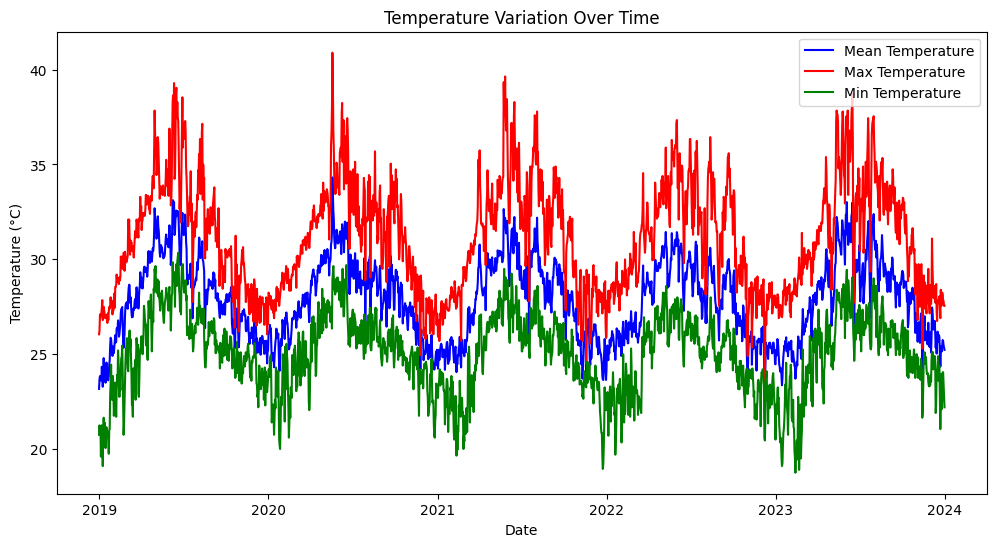

In [6]:
# Time series analysis (if applicable)
import matplotlib.pyplot as plt

# Plotting temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Mean Temperature', color='blue')
plt.plot(df['date'], df['temperature_2m_max'], label='Max Temperature', color='red')
plt.plot(df['date'], df['temperature_2m_min'], label='Min Temperature', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation Over Time')
plt.legend()
plt.show()

In [7]:
import plotly.graph_objects as go

# Create an interactive plot for temperature over time
fig = go.Figure()

# Add traces for mean, max, and min temperatures
fig.add_trace(go.Scatter(
    x=df['date'], y=df['temperature_2m_mean'],
    mode='lines', name='Mean Temperature',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df['date'], y=df['temperature_2m_max'],
    mode='lines', name='Max Temperature',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=df['date'], y=df['temperature_2m_min'],
    mode='lines', name='Min Temperature',
    line=dict(color='green')
))

# Update layout for better aesthetics
fig.update_layout(
    title='Temperature Variation Over Time',
    xaxis_title='Date',
    yaxis_title='Temperature (°C)',
    xaxis=dict(tickfont=dict(size=12), titlefont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=12), titlefont=dict(size=14)),
    legend=dict(font=dict(size=12)),
    width=1000,
    height=600
)

# Show plot
fig.show()


In [11]:
# Correlation matrix
correlation_matrix = df.corr()
correlation_matrix

date  weather_code  temperature_2m_max  \
date                         1.000000      0.122831           -0.005440   
weather_code                 0.122831      1.000000           -0.175793   
temperature_2m_max          -0.005440     -0.175793            1.000000   
temperature_2m_min          -0.077654      0.096286            0.810994   
temperature_2m_mean         -0.047017     -0.092088            0.956546   
apparent_temperature_max     0.027749     -0.055945            0.906079   
apparent_temperature_min    -0.095962      0.149816            0.714149   
apparent_temperature_mean   -0.018804      0.040370            0.851357   
daylight_duration           -0.029007     -0.072704            0.848229   
sunshine_duration           -0.089661     -0.274948            0.284128   
precipitation_sum            0.081603      0.354807           -0.298752   
precipitation_hours          0.072717      0.633326           -0.462270   
wind_speed_10m_max          -0.065997     -0.075818            0.176528   
wind_gusts_10m_max          -0.217486     -0.086941            0.252741   
wind_direction_10m_dominant  0.053764      0.076476            0.682748   
shortwave_radiation_sum     -0.059659     -0.419603            0.498204   
et0_fao_evapotranspiration  -0.075629     -0.445451            0.794400   

                             temperature_2m_min  temperature_2m_mean  \
date                                  -0.077654            -0.047017   
weather_code                           0.096286            -0.092088   
temperature_2m_max                     0.810994             0.956546   
temperature_2m_min                     1.000000             0.923286   
temperature_2m_mean                    0.923286             1.000000   
apparent_temperature_max               0.786977             0.903811   
apparent_temperature_min               0.916606             0.851711   
apparent_temperature_mean              0.876835             0.924085   
daylight_duration                      0.785879             0.871792   
sunshine_duration                      0.059358             0.239547   
precipitation_sum                     -0.114808            -0.264378   
precipitation_hours                   -0.129854            -0.376220   
wind_speed_10m_max                     0.263928             0.209109   
wind_gusts_10m_max                     0.305553             0.273784   
wind_direction_10m_dominant            0.606509             0.657883   
shortwave_radiation_sum                0.200180             0.437351   
et0_fao_evapotranspiration             0.506520             0.732397   

                             apparent_temperature_max  \
date                                         0.027749   
weather_code                                -0.055945   
temperature_2m_max                           0.906079   
temperature_2m_min                           0.786977   
temperature_2m_mean                          0.903811   
apparent_temperature_max                     1.000000   
apparent_temperature_min                     0.803614   
apparent_temperature_mean                    0.949647   
daylight_duration                            0.835190   
sunshine_duration                            0.320978   
precipitation_sum                           -0.234302   
precipitation_hours                         -0.359018   
wind_speed_10m_max                          -0.040732   
wind_gusts_10m_max                           0.022197   
wind_direction_10m_dominant                  0.685137   
shortwave_radiation_sum                      0.536097   
et0_fao_evapotranspiration                   0.670107   

                             apparent_temperature_min  \
date                                        -0.095962   
weather_code                                 0.149816   
temperature_2m_max                           0.714149   
temperature_2m_min                           0.916606   
temperature_2m_mean                          0.851711   
apparent_tempera

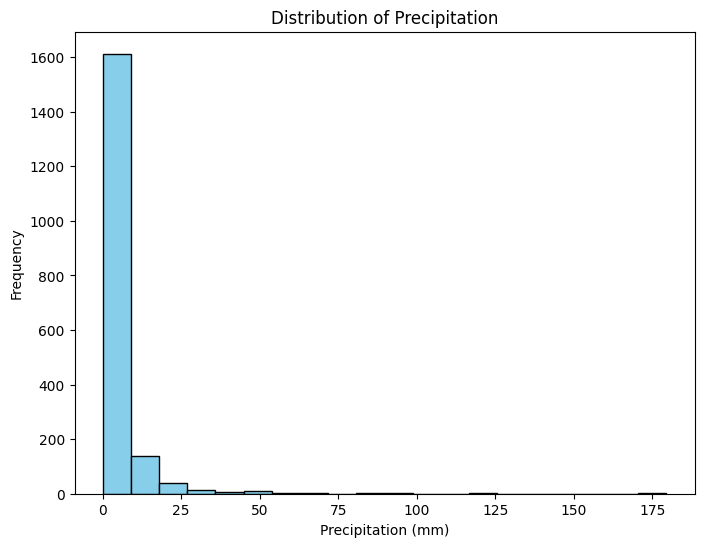

In [14]:
# Histogram of precipitation
plt.figure(figsize=(8, 6))
plt.hist(df['precipitation_sum'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')
plt.show()

In [9]:
import plotly.express as px

# Create an interactive histogram for precipitation
fig = px.histogram(
    df,
    x='precipitation_sum',
    nbins=20,
    title='Distribution of Precipitation',
    labels={'precipitation_sum': 'Precipitation (mm)'},
    template='plotly_white',
    color_discrete_sequence=['skyblue']
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Precipitation (mm)',
    yaxis_title='Frequency',
    bargap=0.2,
    width=800,
    height=600
)

# Show plot
fig.show()


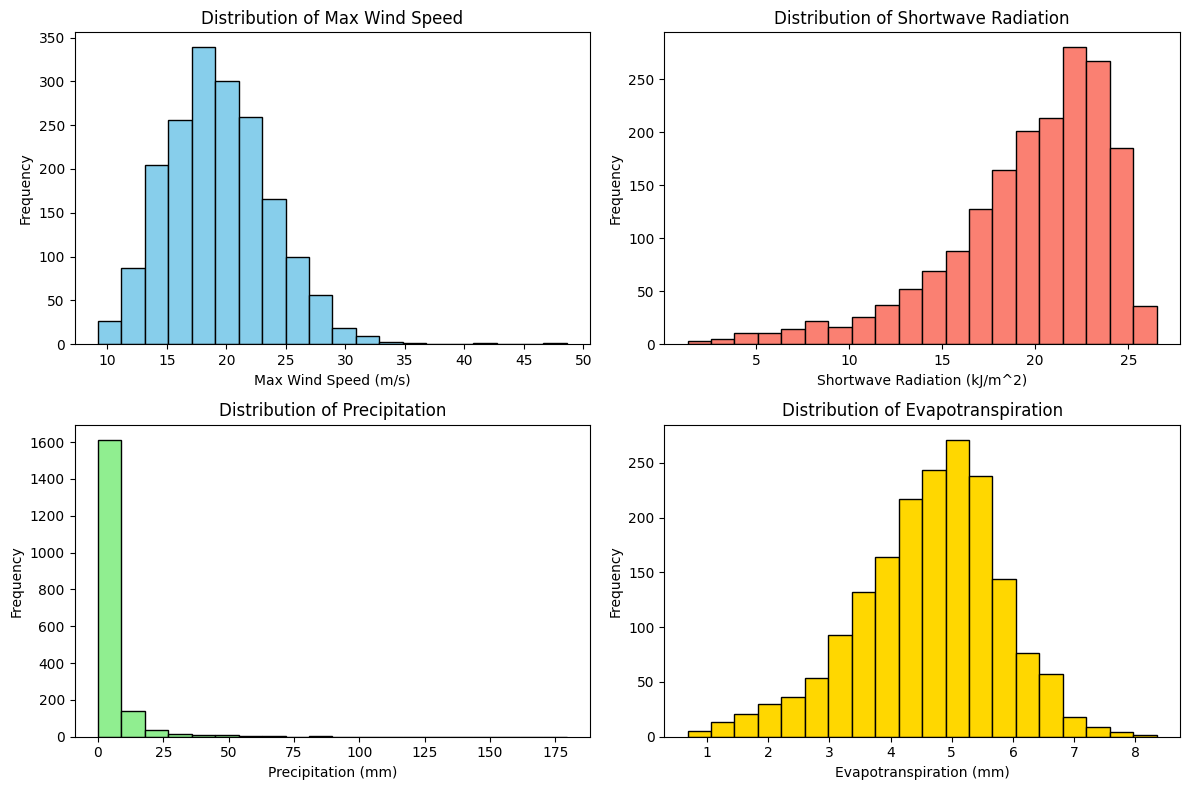

In [15]:
# Distribution visualization
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['wind_speed_10m_max'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Max Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Max Wind Speed')

plt.subplot(2, 2, 2)
plt.hist(df['shortwave_radiation_sum'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Shortwave Radiation (kJ/m^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Shortwave Radiation')

plt.subplot(2, 2, 3)
plt.hist(df['precipitation_sum'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')

plt.subplot(2, 2, 4)
plt.hist(df['et0_fao_evapotranspiration'], bins=20, color='gold', edgecolor='black')
plt.xlabel('Evapotranspiration (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Evapotranspiration')

plt.tight_layout()
plt.show()

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 2x2 subplot
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Distribution of Max Wind Speed',
        'Distribution of Shortwave Radiation',
        'Distribution of Precipitation',
        'Distribution of Evapotranspiration'
    )
)

# Add histogram for Max Wind Speed
fig.add_trace(go.Histogram(
    x=df['wind_speed_10m_max'],
    nbinsx=20,
    marker_color='skyblue',
    marker_line_color='black',
    marker_line_width=1.5,
    name='Max Wind Speed'
), row=1, col=1)

# Add histogram for Shortwave Radiation
fig.add_trace(go.Histogram(
    x=df['shortwave_radiation_sum'],
    nbinsx=20,
    marker_color='salmon',
    marker_line_color='black',
    marker_line_width=1.5,
    name='Shortwave Radiation'
), row=1, col=2)

# Add histogram for Precipitation
fig.add_trace(go.Histogram(
    x=df['precipitation_sum'],
    nbinsx=20,
    marker_color='lightgreen',
    marker_line_color='black',
    marker_line_width=1.5,
    name='Precipitation'
), row=2, col=1)

# Add histogram for Evapotranspiration
fig.add_trace(go.Histogram(
    x=df['et0_fao_evapotranspiration'],
    nbinsx=20,
    marker_color='gold',
    marker_line_color='black',
    marker_line_width=1.5,
    name='Evapotranspiration'
), row=2, col=2)

# Update layout
fig.update_layout(
    title='Distribution Visualizations',
    xaxis_title='Value',
    yaxis_title='Frequency',
    width=800,
    height=800,
    showlegend=False,
    template='plotly_white'
)

# Update x and y axes labels
fig.update_xaxes(title_text='Max Wind Speed (m/s)', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=1)

fig.update_xaxes(title_text='Shortwave Radiation (kJ/m^2)', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=1, col=2)

fig.update_xaxes(title_text='Precipitation (mm)', row=2, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=1)

fig.update_xaxes(title_text='Evapotranspiration (mm)', row=2, col=2)
fig.update_yaxes(title_text='Frequency', row=2, col=2)

# Show plot
fig.show()


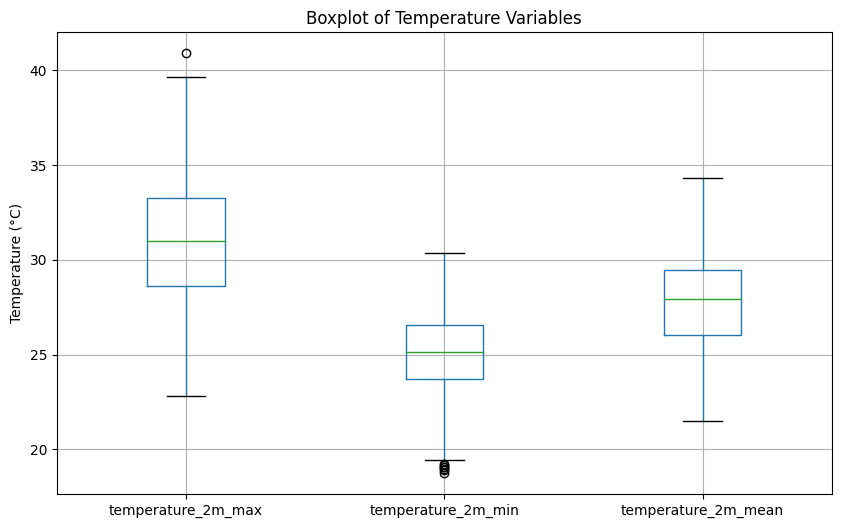

In [16]:
# Boxplot of temperature variables
plt.figure(figsize=(10, 6))
df[['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean']].boxplot()
plt.ylabel('Temperature (°C)')
plt.title('Boxplot of Temperature Variables')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Prepare data
data = [
    go.Box(y=df['temperature_2m_max'], name='Max Temperature', marker_color='red'),
    go.Box(y=df['temperature_2m_min'], name='Min Temperature', marker_color='blue'),
    go.Box(y=df['temperature_2m_mean'], name='Mean Temperature', marker_color='green')
]

# Create the boxplot
fig = go.Figure(data)

# Update layout for better aesthetics
fig.update_layout(
    title='Boxplot of Temperature Variables',
    yaxis_title='Temperature (°C)',
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    width=800,
    height=600,
    template='plotly_white'
)

# Show plot
fig.show()


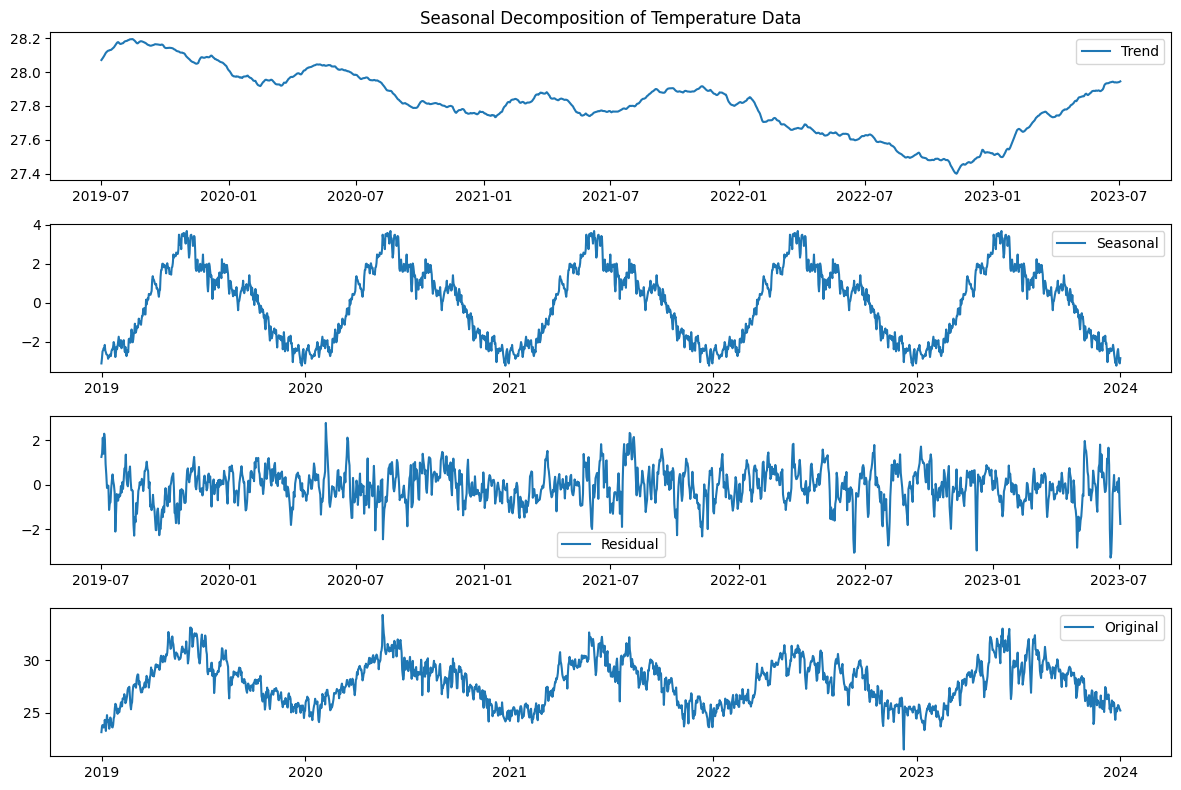

In [17]:
# Seasonal decomposition (if applicable)
from statsmodels.tsa.seasonal import seasonal_decompose

temperature_data = df[['date', 'temperature_2m_mean']]
temperature_data.set_index('date', inplace=True)
decomposition = seasonal_decompose(temperature_data, model='additive', period=365)

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.title('Seasonal Decomposition of Temperature Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(temperature_data, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Prepare the data
temperature_data = df[['date', 'temperature_2m_mean']]
temperature_data.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(temperature_data, model='additive', period=365)

# Create a 4x1 subplot
fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=(
        'Trend',
        'Seasonal',
        'Residual',
        'Original'
    )
)

# Add traces for each component
fig.add_trace(go.Scatter(
    x=decomposition.trend.index, y=decomposition.trend,
    mode='lines', name='Trend',
    line=dict(color='blue')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=decomposition.seasonal.index, y=decomposition.seasonal,
    mode='lines', name='Seasonal',
    line=dict(color='orange')
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=decomposition.resid.index, y=decomposition.resid,
    mode='lines', name='Residual',
    line=dict(color='green')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=temperature_data.index, y=temperature_data['temperature_2m_mean'],
    mode='lines', name='Original',
    line=dict(color='black')
), row=4, col=1)

# Update layout
fig.update_layout(
    title='Seasonal Decomposition of Temperature Data',
    height=1000,
    width=800,
    showlegend=False,
    template='plotly_white'
)

# Update y-axis labels
fig.update_yaxes(title_text='Temperature (°C)', row=1, col=1)
fig.update_yaxes(title_text='Temperature (°C)', row=2, col=1)
fig.update_yaxes(title_text='Temperature (°C)', row=3, col=1)
fig.update_yaxes(title_text='Temperature (°C)', row=4, col=1)

# Show plot
fig.show()


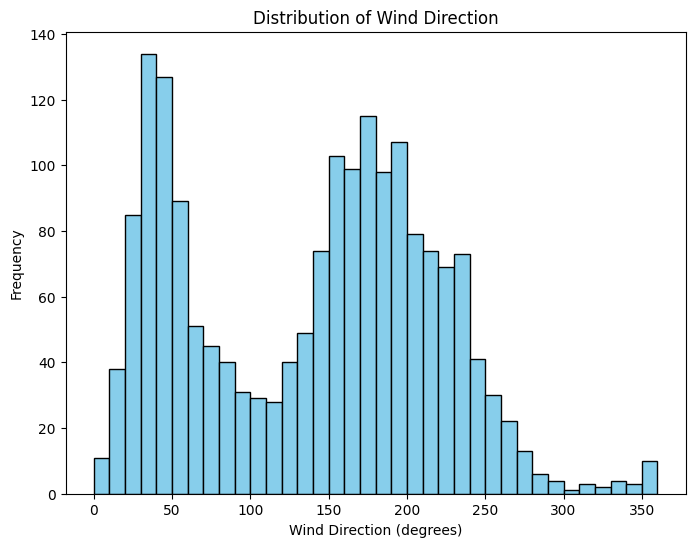

In [18]:
# Wind direction analysis (if applicable)
plt.figure(figsize=(8, 6))
plt.hist(df['wind_direction_10m_dominant'], bins=36, range=(0, 360), color='skyblue', edgecolor='black')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Direction')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

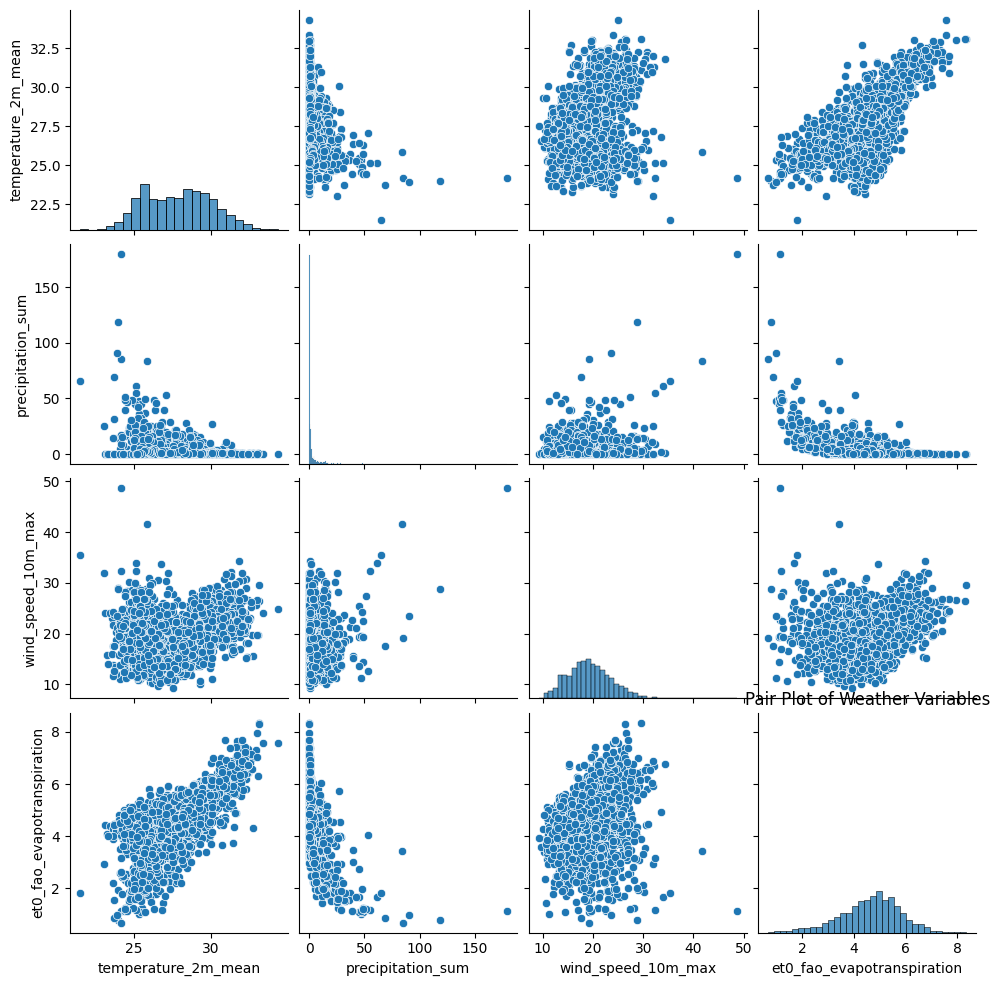

In [19]:
# Relationship between variables
import seaborn as sns

sns.pairplot(df[['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max', 'et0_fao_evapotranspiration']])
plt.title('Pair Plot of Weather Variables')
plt.show()

In [13]:
import plotly.express as px

# Create an interactive pair plot (scatter matrix) for the weather variables
fig = px.scatter_matrix(
    df,
    dimensions=['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max', 'et0_fao_evapotranspiration'],
    labels={
        'temperature_2m_mean': 'Mean Temperature (°C)',
        'precipitation_sum': 'Precipitation (mm)',
        'wind_speed_10m_max': 'Max Wind Speed (m/s)',
        'et0_fao_evapotranspiration': 'Evapotranspiration (mm)'
    },
    title='Pair Plot of Weather Variables',
    template='plotly_white'
)

# Update layout for better aesthetics
fig.update_layout(
    width=800,
    height=800
)

# Show plot
fig.show()


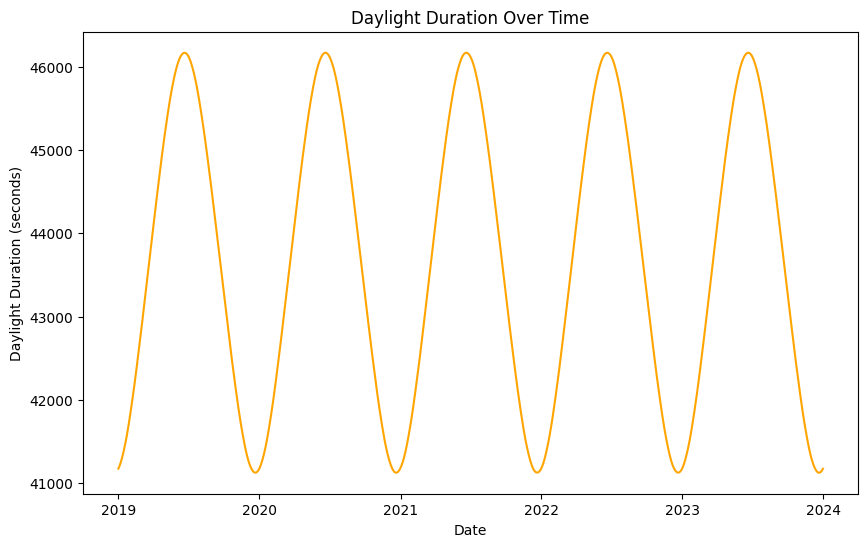

In [20]:
# Daylight duration analysis (if applicable)
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['daylight_duration'], color='orange')
plt.xlabel('Date')
plt.ylabel('Daylight Duration (seconds)')
plt.title('Daylight Duration Over Time')
plt.show()

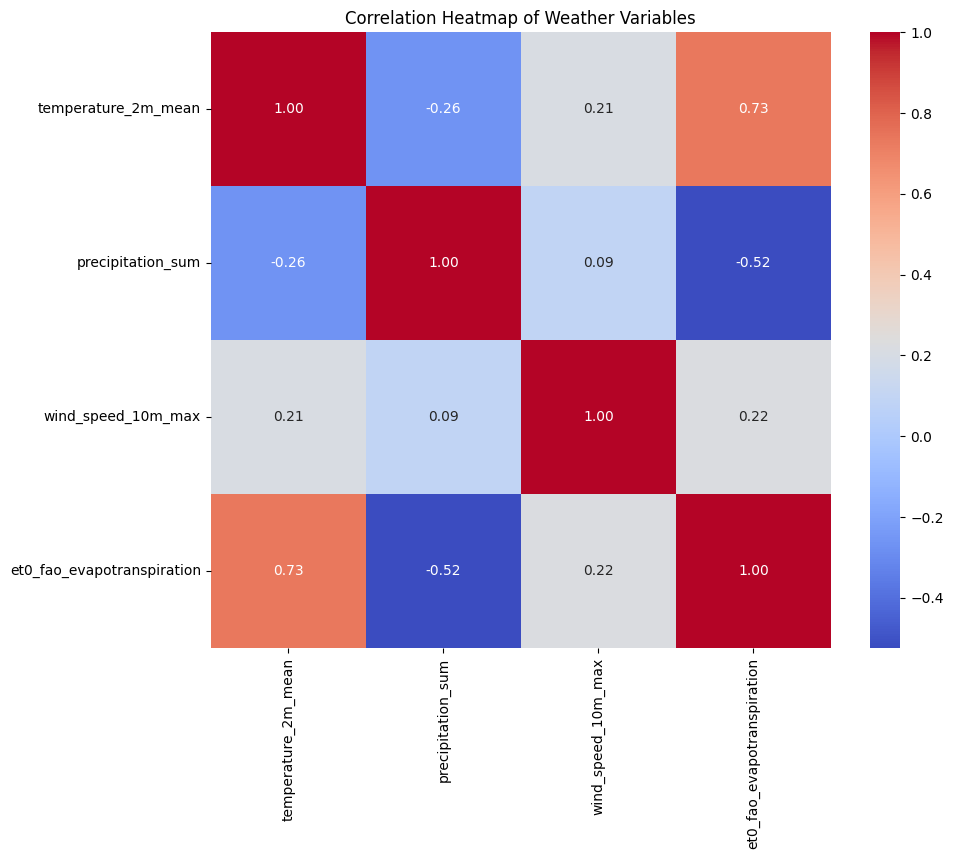

In [21]:
# Heatmap of variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max', 'et0_fao_evapotranspiration']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather Variables')
plt.show()


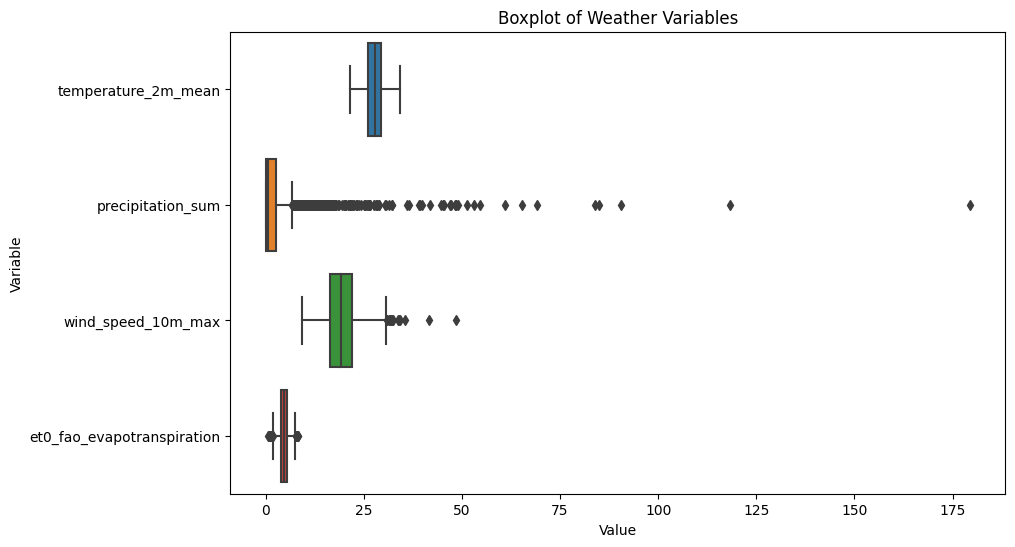

In [22]:
# Outlier detection (if applicable)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max', 'et0_fao_evapotranspiration']], orient='h')
plt.title('Boxplot of Weather Variables')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()

In [14]:
import plotly.express as px
import pandas as pd

# Prepare the data by melting the DataFrame
df_melted = df.melt(value_vars=['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max', 'et0_fao_evapotranspiration'], 
                    var_name='Variable', value_name='Value')

# Create an interactive boxplot
fig = px.box(
    df_melted,
    x='Value',
    y='Variable',
    title='Boxplot of Weather Variables',
    labels={'Value': 'Value', 'Variable': 'Variable'},
    template='plotly_white',
    orientation='h',
    color='Variable'
)

# Update layout for better aesthetics
fig.update_layout(
    width=1000,
    height=600
)

# Show plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



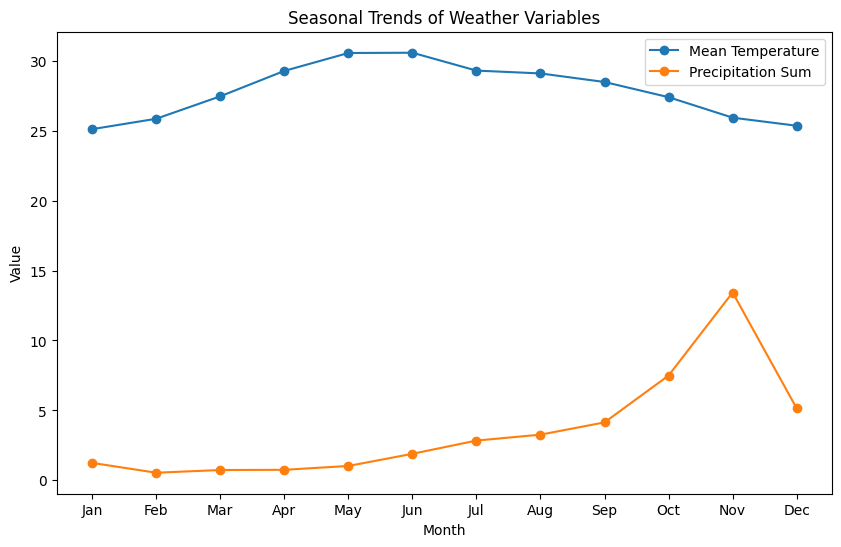

In [23]:
# Seasonal trends analysis (if applicable)
# Extract month from the date column
df['month'] = df['date'].dt.month

# Aggregate data by month and calculate mean values
monthly_mean = df.groupby('month').mean()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean['temperature_2m_mean'], marker='o', label='Mean Temperature')
plt.plot(monthly_mean.index, monthly_mean['precipitation_sum'], marker='o', label='Precipitation Sum')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Seasonal Trends of Weather Variables')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()


In [15]:
import plotly.graph_objects as go

# Extract month from the date column
df['month'] = df['date'].dt.month

# Aggregate data by month and calculate mean values
monthly_mean = df.groupby('month').mean()

# Create an interactive plot for seasonal trends
fig = go.Figure()

# Add trace for Mean Temperature
fig.add_trace(go.Scatter(
    x=monthly_mean.index, y=monthly_mean['temperature_2m_mean'],
    mode='lines+markers', name='Mean Temperature',
    line=dict(color='blue'),
    marker=dict(color='blue')
))

# Add trace for Precipitation Sum
fig.add_trace(go.Scatter(
    x=monthly_mean.index, y=monthly_mean['precipitation_sum'],
    mode='lines+markers', name='Precipitation Sum',
    line=dict(color='orange'),
    marker=dict(color='orange')
))

# Update layout for better aesthetics
fig.update_layout(
    title='Seasonal Trends of Weather Variables',
    xaxis_title='Month',
    yaxis_title='Value',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    width=1000,
    height=600,
    template='plotly_white'
)

# Show plot
fig.show()


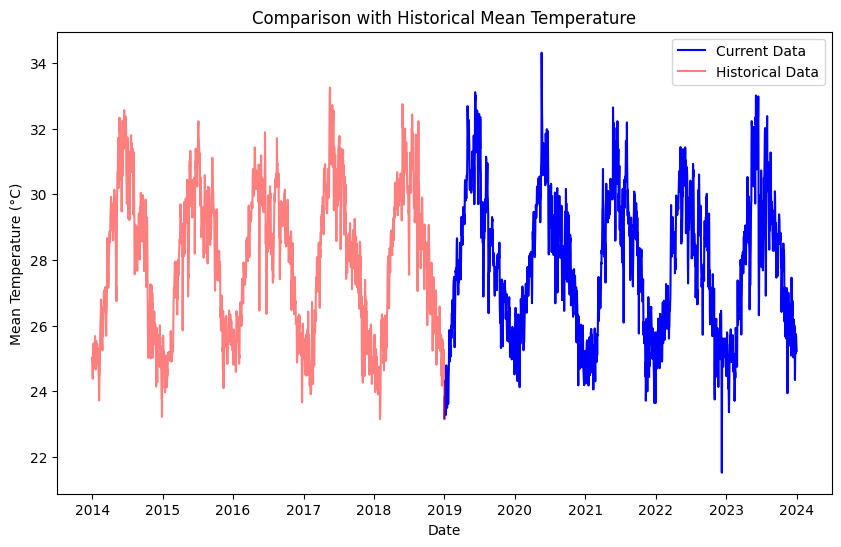

In [24]:
# Comparison with historical data (if available)
# Assuming historical data is stored in another DataFrame called historical_df
# Plotting mean temperature comparison
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Current Data', color='blue')
plt.plot(historical_df['date'], historical_df['temperature_2m_mean'], label='Historical Data', color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Comparison with Historical Mean Temperature')
plt.legend()
plt.show()

In [25]:
# Frequency of weather events (if applicable)
# Example: Counting rainy days
rainy_days = df[df['precipitation_sum'] > 0]
num_rainy_days = len(rainy_days)
print("Number of rainy days:", num_rainy_days)

Number of rainy days: 1242


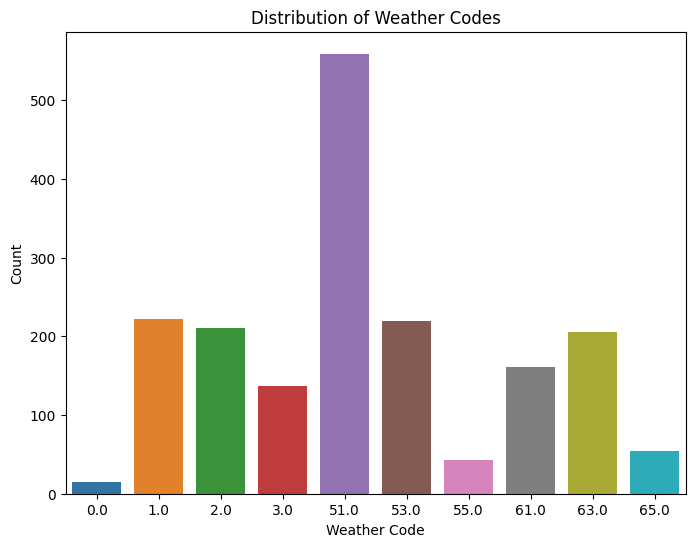

In [26]:
# Categorical variable analysis (if applicable)
# Example: Distribution of weather codes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='weather_code')
plt.title('Distribution of Weather Codes')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.show()

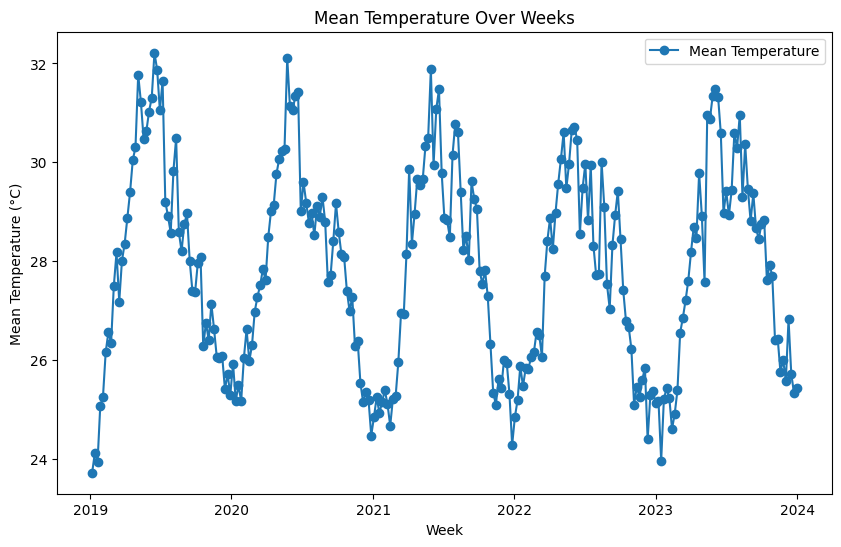

In [27]:
# Temporal aggregation (if applicable)
# Example: Aggregate data by week and calculate mean values
weekly_mean = df.resample('W', on='date').mean()

# Plotting mean temperature over weeks
plt.figure(figsize=(10, 6))
plt.plot(weekly_mean.index, weekly_mean['temperature_2m_mean'], marker='o', label='Mean Temperature')
plt.xlabel('Week')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Over Weeks')
plt.legend()
plt.show()

In [28]:
# Extreme event analysis (if applicable)
# Example: Detect heatwaves based on temperature thresholds
threshold=34
heatwaves = df[df['temperature_2m_mean'] > threshold]
heatwaves

date  weather_code  temperature_2m_max  \
504 2020-05-18 18:30:00+00:00           2.0           40.893501   

     temperature_2m_min  temperature_2m_mean  apparent_temperature_max  \
504           28.893499            34.316418                 42.687229   

     apparent_temperature_min  apparent_temperature_mean  daylight_duration  \
504                  31.43203                  36.331585        45735.09375   

     sunshine_duration  precipitation_sum  precipitation_hours  \
504        35986.15625                0.0                  0.0   

     wind_speed_10m_max  wind_gusts_10m_max  wind_direction_10m_dominant  \
504           24.923338           48.959999                   282.048737   

     shortwave_radiation_sum  et0_fao_evapotranspiration  month  
504                20.549999                    7.574658      5

In [29]:
# Seasonal decomposition (if applicable)
# Example: Decompose temperature time series into trend, seasonal, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['temperature_2m_mean'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


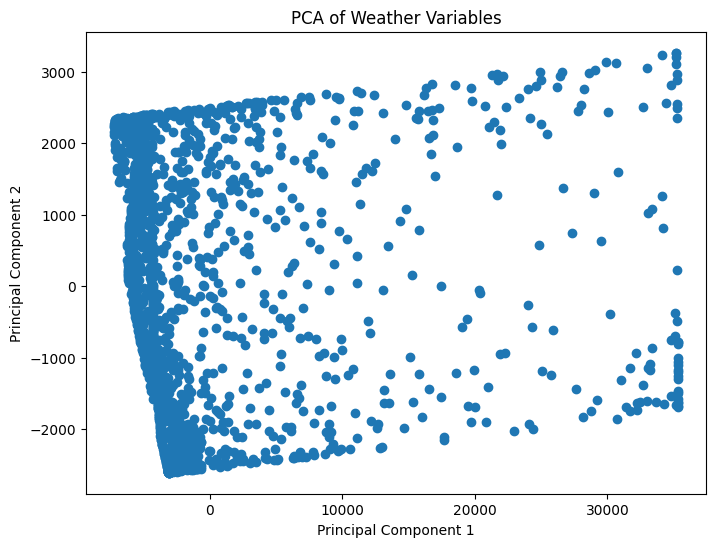

In [30]:
# Multivariate analysis (if applicable)
# Example: PCA to identify dominant patterns in weather variables
from sklearn.decomposition import PCA

# Assuming df contains only numerical weather variables
X = df.drop(['date'], axis=1)  # Remove non-numeric columns if any
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Weather Variables')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

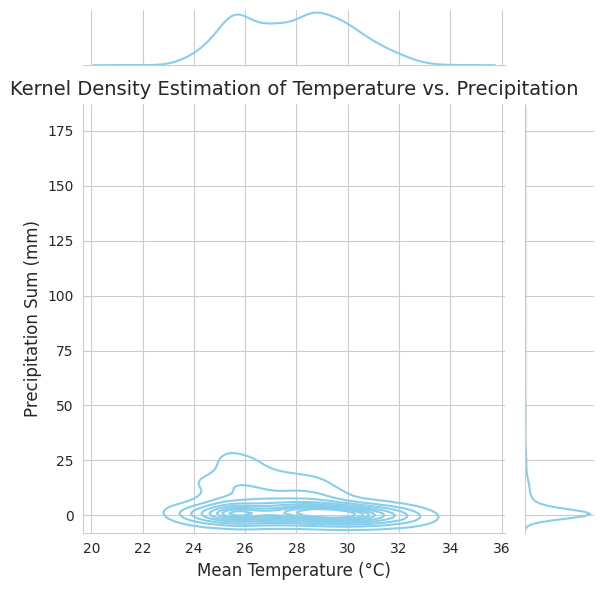

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Kernel Density Estimation (KDE) of temperature and precipitation
sns.jointplot(x='temperature_2m_mean', y='precipitation_sum', data=df, kind='kde', color='skyblue')

# Set labels and title with increased font size
plt.xlabel('Mean Temperature (°C)', fontsize=12)
plt.ylabel('Precipitation Sum (mm)', fontsize=12)
plt.title('Kernel Density Estimation of Temperature vs. Precipitation', fontsize=14)

# Display the plot with a tighter layout
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


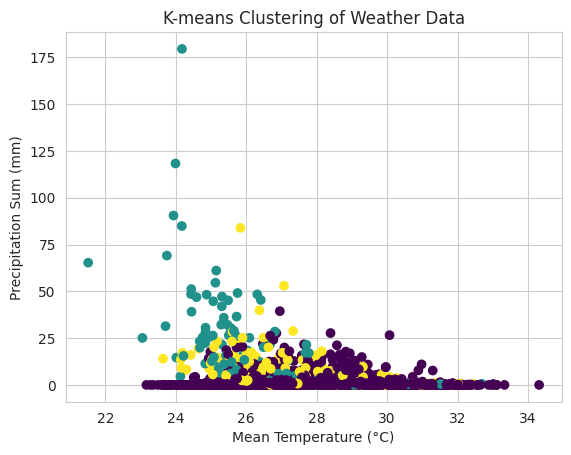

In [32]:
# Cluster analysis (if applicable)
# Example: K-means clustering of weather data
from sklearn.cluster import KMeans

# Assuming df contains only numerical weather variables
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df.drop(['date'], axis=1))

# Visualize clusters
plt.scatter(df['temperature_2m_mean'], df['precipitation_sum'], c=clusters, cmap='viridis')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Precipitation Sum (mm)')
plt.title('K-means Clustering of Weather Data')
plt.show()

In [35]:
import plotly.express as px

fig = px.scatter(df, x='temperature_2m_mean', y='precipitation_sum', color='wind_speed_10m_max', hover_data=['date'])
fig.update_layout(title='Interactive Scatter Plot of Weather Data', xaxis_title='Mean Temperature (°C)', yaxis_title='Precipitation Sum (mm)')
fig.show()

In [36]:
from statsmodels.tsa.seasonal import STL

# STL decomposition of temperature data
stl = STL(df['temperature_2m_mean'], seasonal=13)
result = stl.fit()

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(3, 1, 3)
plt.plot(result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()


ValueError: Unable to determine period from endog

In [37]:
# Feature engineering example: Calculate temperature range and add as new feature
df['temperature_range'] = df['temperature_2m_max'] - df['temperature_2m_min']

# Calculate rolling mean of temperature
df['rolling_mean_temp'] = df['temperature_2m_mean'].rolling(window=7).mean()

In [39]:
df['rolling_mean_temp'].value_counts()

rolling_mean_temp
27.555107    2
28.748559    2
25.649750    2
29.910464    1
30.673560    1
            ..
28.529214    1
28.759571    1
28.797071    1
28.705108    1
25.434273    1
Name: count, Length: 1818, dtype: int64

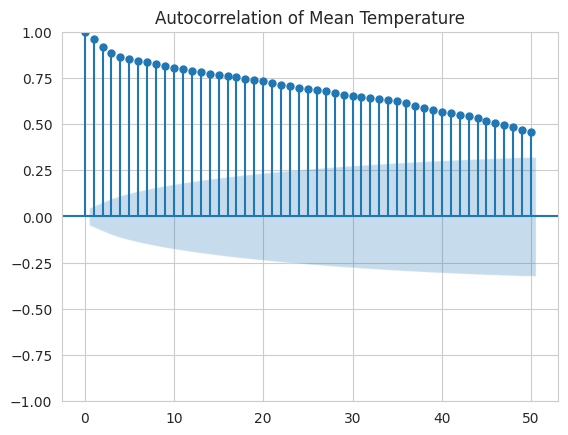

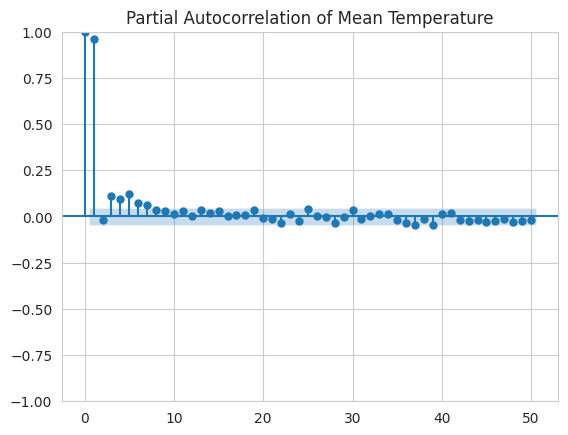

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot for mean temperature
plot_acf(df['temperature_2m_mean'].dropna(), lags=50)
plt.title('Autocorrelation of Mean Temperature')
plt.show()

# Partial autocorrelation plot for mean temperature
plot_pacf(df['temperature_2m_mean'].dropna(), lags=50)
plt.title('Partial Autocorrelation of Mean Temperature')
plt.show()

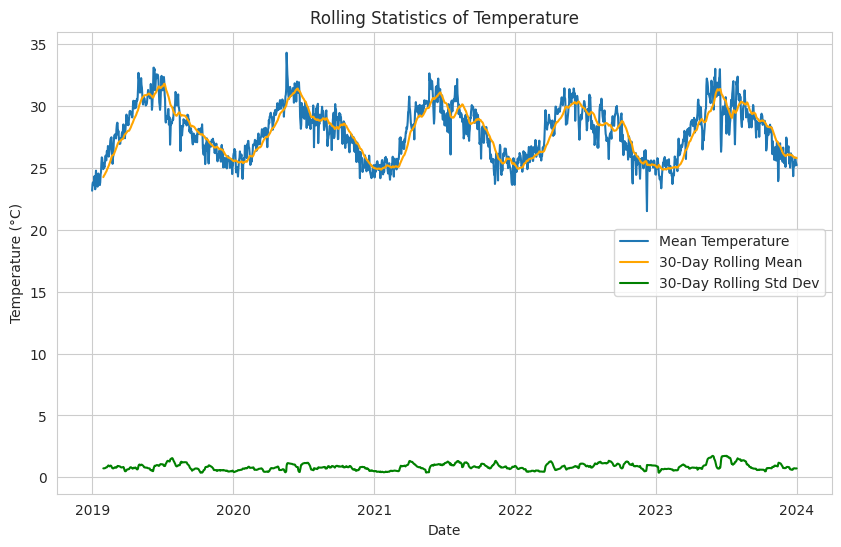

In [41]:
# Rolling mean and standard deviation of temperature
df['rolling_mean'] = df['temperature_2m_mean'].rolling(window=30).mean()
df['rolling_std'] = df['temperature_2m_mean'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Mean Temperature')
plt.plot(df['date'], df['rolling_mean'], label='30-Day Rolling Mean', color='orange')
plt.plot(df['date'], df['rolling_std'], label='30-Day Rolling Std Dev', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Rolling Statistics of Temperature')
plt.legend()
plt.show()


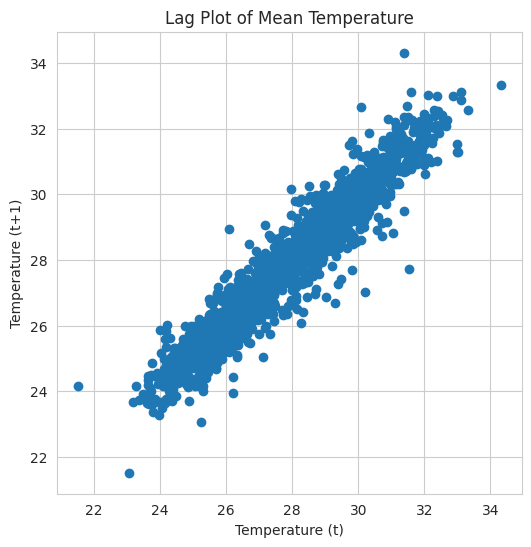

In [42]:
from pandas.plotting import lag_plot

# Lag plot for mean temperature
plt.figure(figsize=(6, 6))
lag_plot(df['temperature_2m_mean'].dropna())
plt.title('Lag Plot of Mean Temperature')
plt.xlabel('Temperature (t)')
plt.ylabel('Temperature (t+1)')
plt.show()


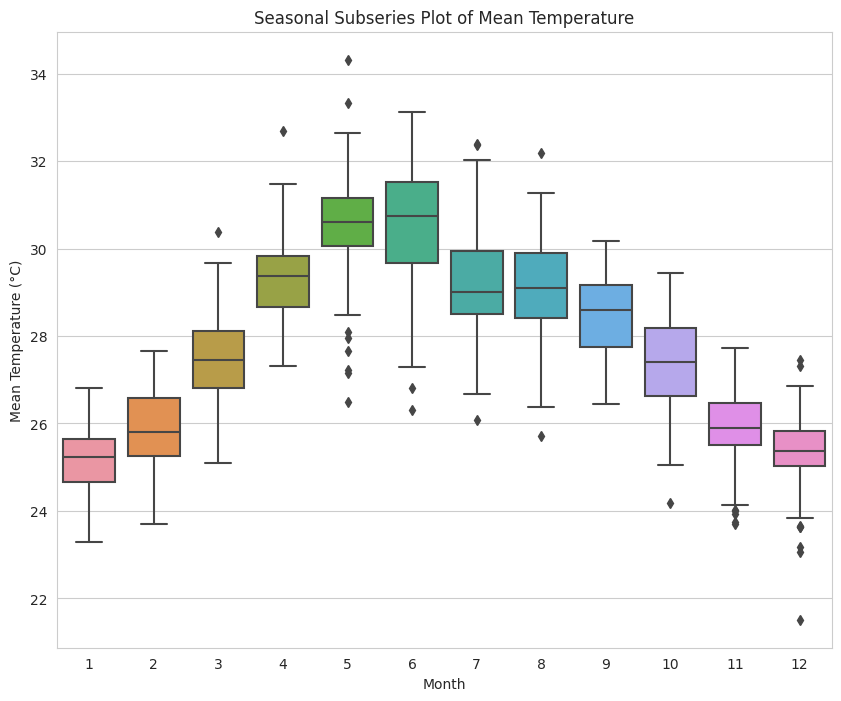

In [43]:
# Seasonal subseries plot for mean temperature
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['date'].dt.month, y=df['temperature_2m_mean'])
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Seasonal Subseries Plot of Mean Temperature')
plt.show()


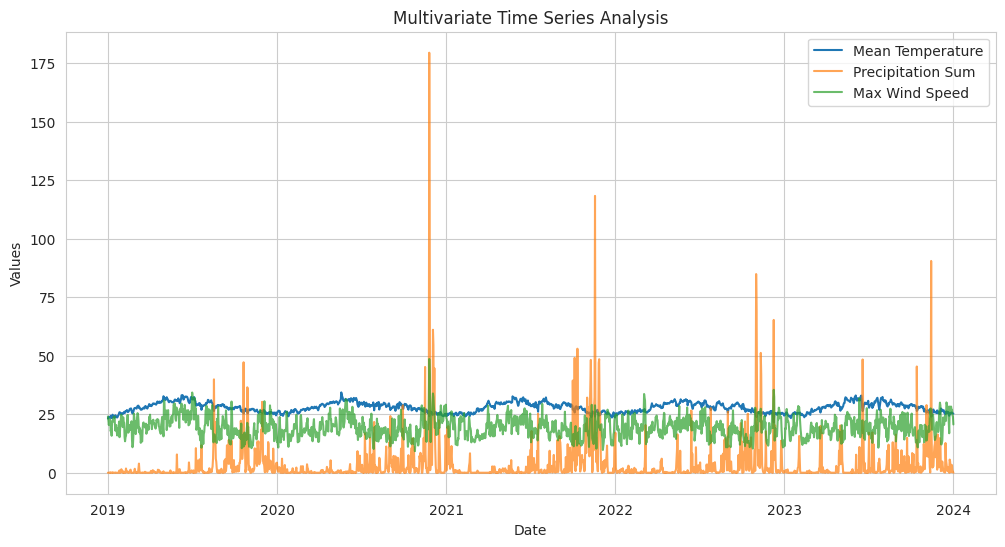

In [44]:
# Multivariate time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Mean Temperature')
plt.plot(df['date'], df['precipitation_sum'], label='Precipitation Sum', alpha=0.7)
plt.plot(df['date'], df['wind_speed_10m_max'], label='Max Wind Speed', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Multivariate Time Series Analysis')
plt.legend()
plt.show()

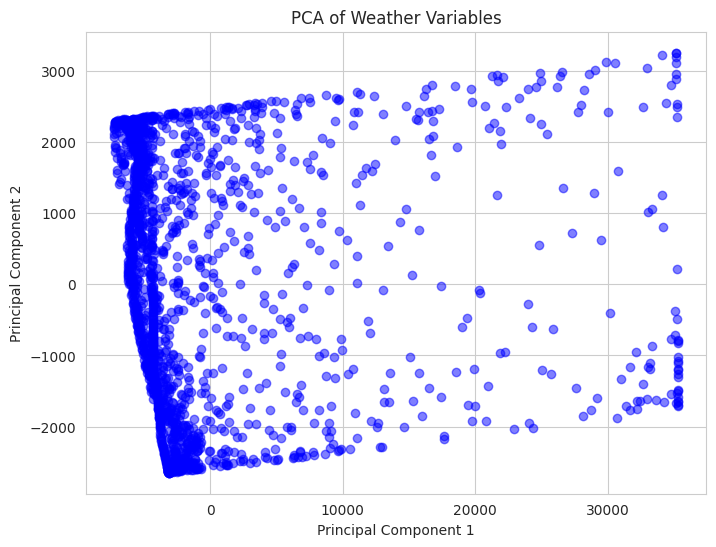

In [45]:
# Dimensionality reduction example: PCA
from sklearn.decomposition import PCA

X = df.drop(['date'], axis=1).dropna()  # Ensure no missing values and exclude date column
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Weather Variables')
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



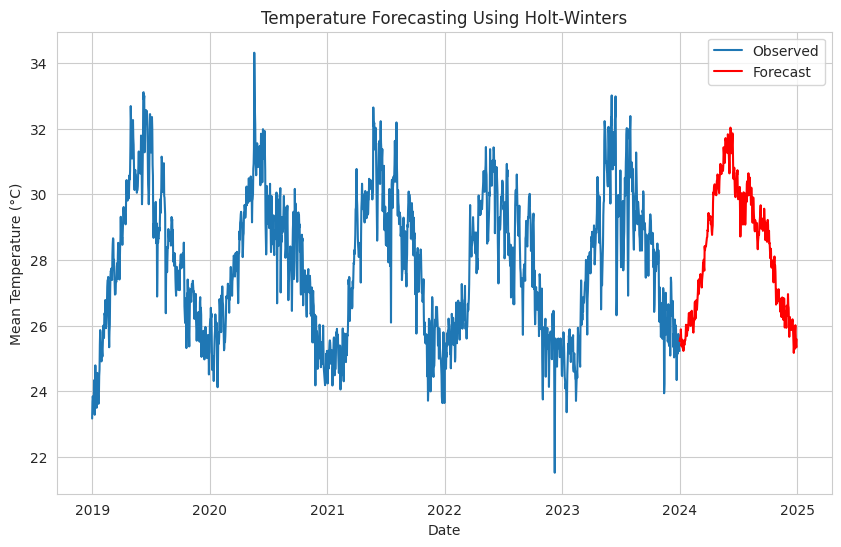

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters exponential smoothing for temperature forecasting
model = ExponentialSmoothing(df['temperature_2m_mean'], trend='add', seasonal='add', seasonal_periods=365)
fit = model.fit()

forecast = fit.forecast(steps=365)

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Observed')
plt.plot(pd.date_range(df['date'].iloc[-1], periods=365, freq='D'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Temperature Forecasting Using Holt-Winters')
plt.legend()
plt.show()


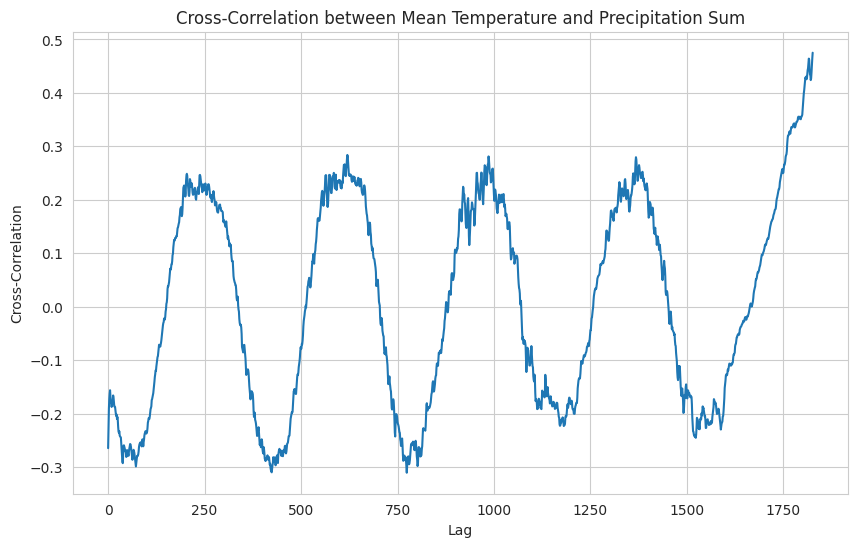

In [47]:
from statsmodels.tsa.stattools import ccf

# Cross-correlation between temperature and precipitation
cross_corr = ccf(df['temperature_2m_mean'].dropna(), df['precipitation_sum'].dropna())

plt.figure(figsize=(10, 6))
plt.plot(cross_corr)
plt.title('Cross-Correlation between Mean Temperature and Precipitation Sum')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.show()


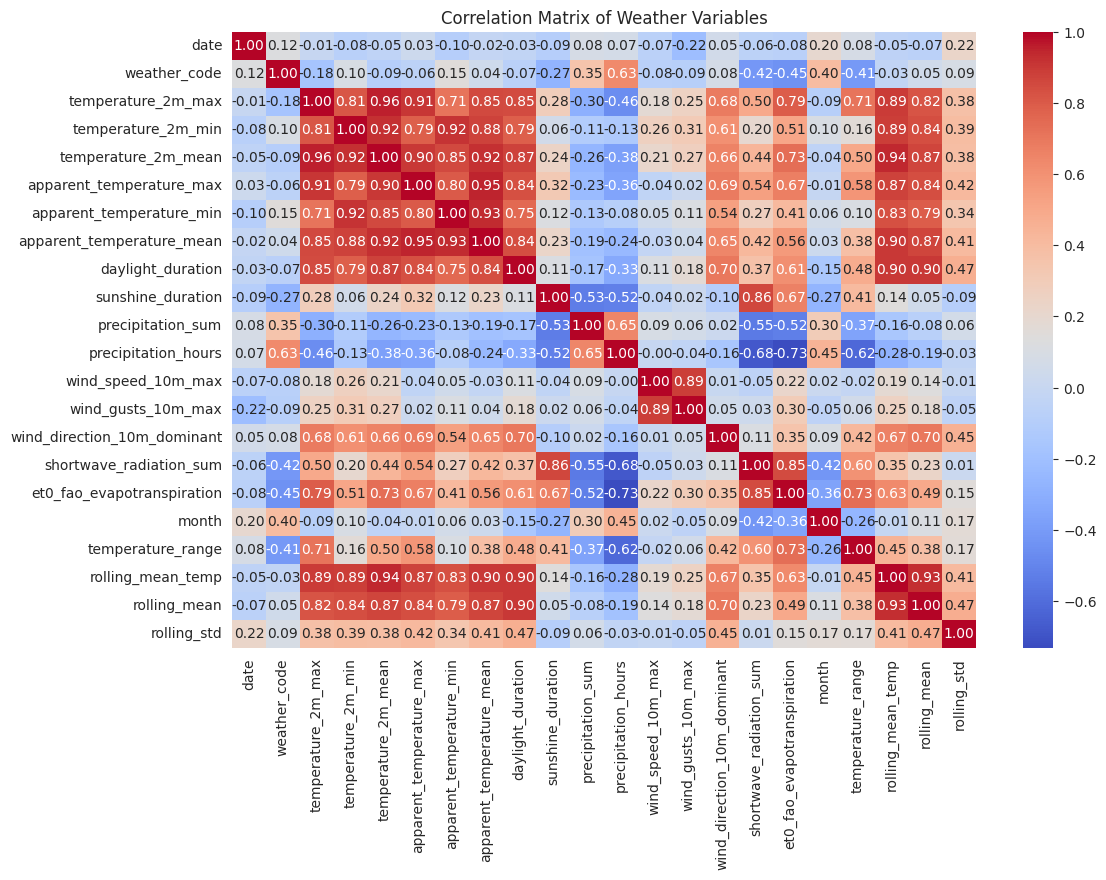

In [48]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Variables')
plt.show()


In [49]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation test
pearson_corr, p_value = pearsonr(df['temperature_2m_mean'].dropna(), df['precipitation_sum'].dropna())
print('Pearson Correlation:', pearson_corr)
print('P-value:', p_value)

# Spearman correlation test
spearman_corr, p_value = spearmanr(df['temperature_2m_mean'].dropna(), df['precipitation_sum'].dropna())
print('Spearman Correlation:', spearman_corr)
print('P-value:', p_value)


Pearson Correlation: -0.26437756925833567
P-value: 1.3524931756467216e-30
Spearman Correlation: -0.20846527658753553
P-value: 2.186083112588789e-19


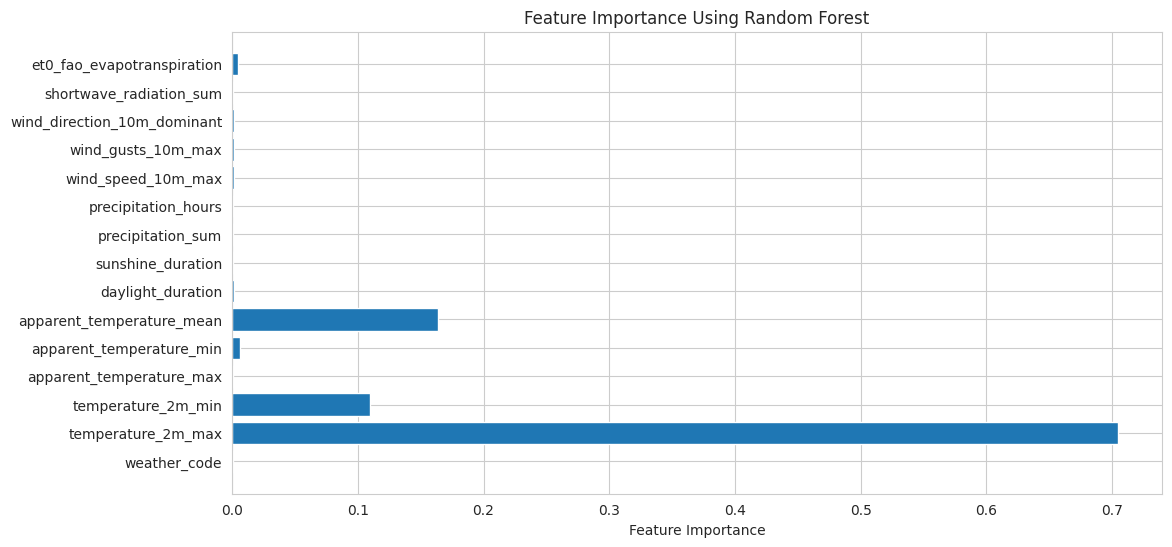

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Feature importance analysis with random forest
X = df.drop(['date', 'temperature_2m_mean'], axis=1).dropna()
y = df['temperature_2m_mean'].dropna()

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Using Random Forest')
plt.show()


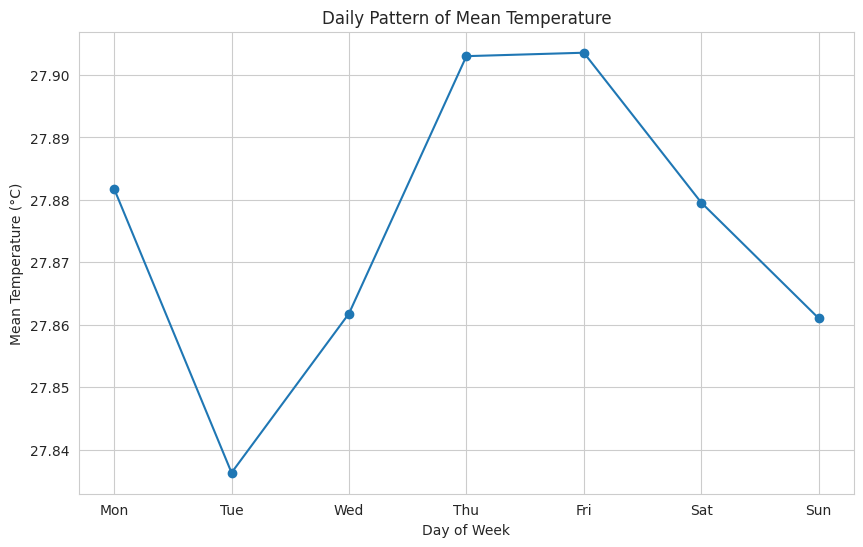

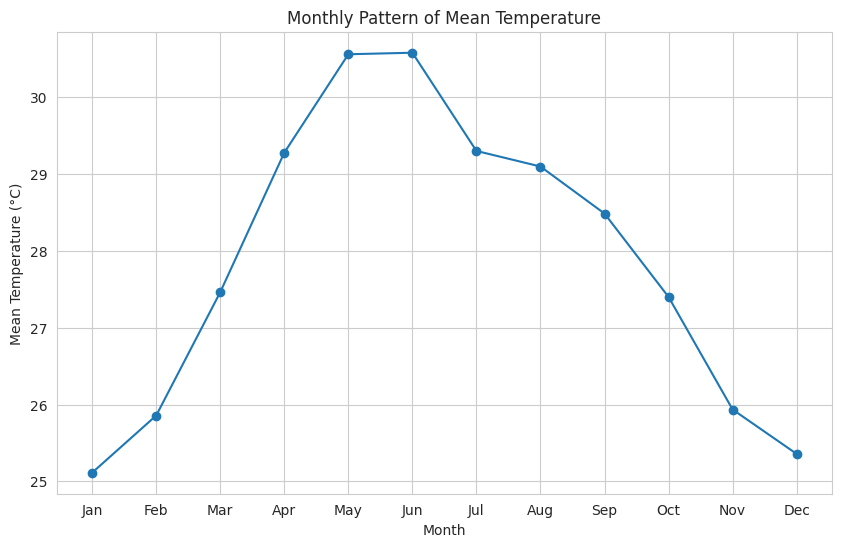

In [53]:
# Extract day of the week and month from the date column
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Daily pattern analysis
daily_pattern = df.groupby('day_of_week')['temperature_2m_mean'].mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_pattern.index, daily_pattern.values, marker='o')
plt.xlabel('Day of Week')
plt.ylabel('Mean Temperature (°C)')
plt.title('Daily Pattern of Mean Temperature')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Monthly pattern analysis
monthly_pattern = df.groupby('month')['temperature_2m_mean'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_pattern.index, monthly_pattern.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Monthly Pattern of Mean Temperature')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
    

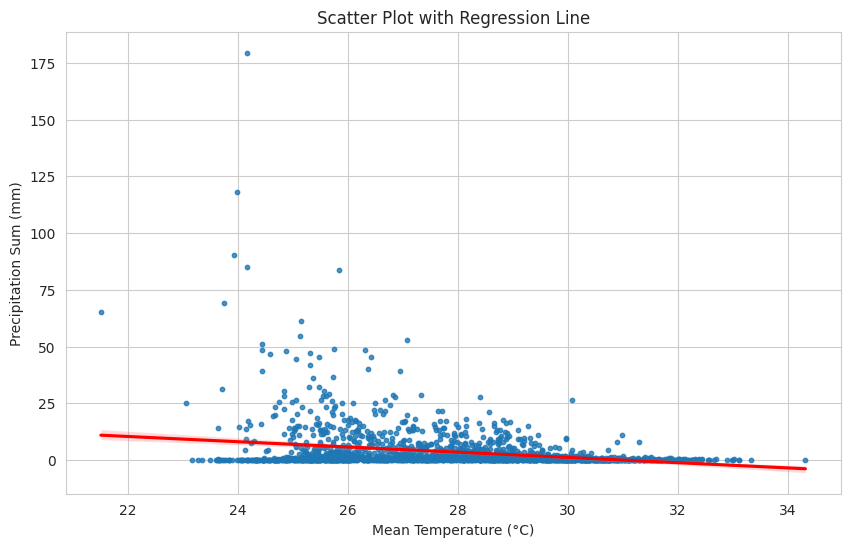

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



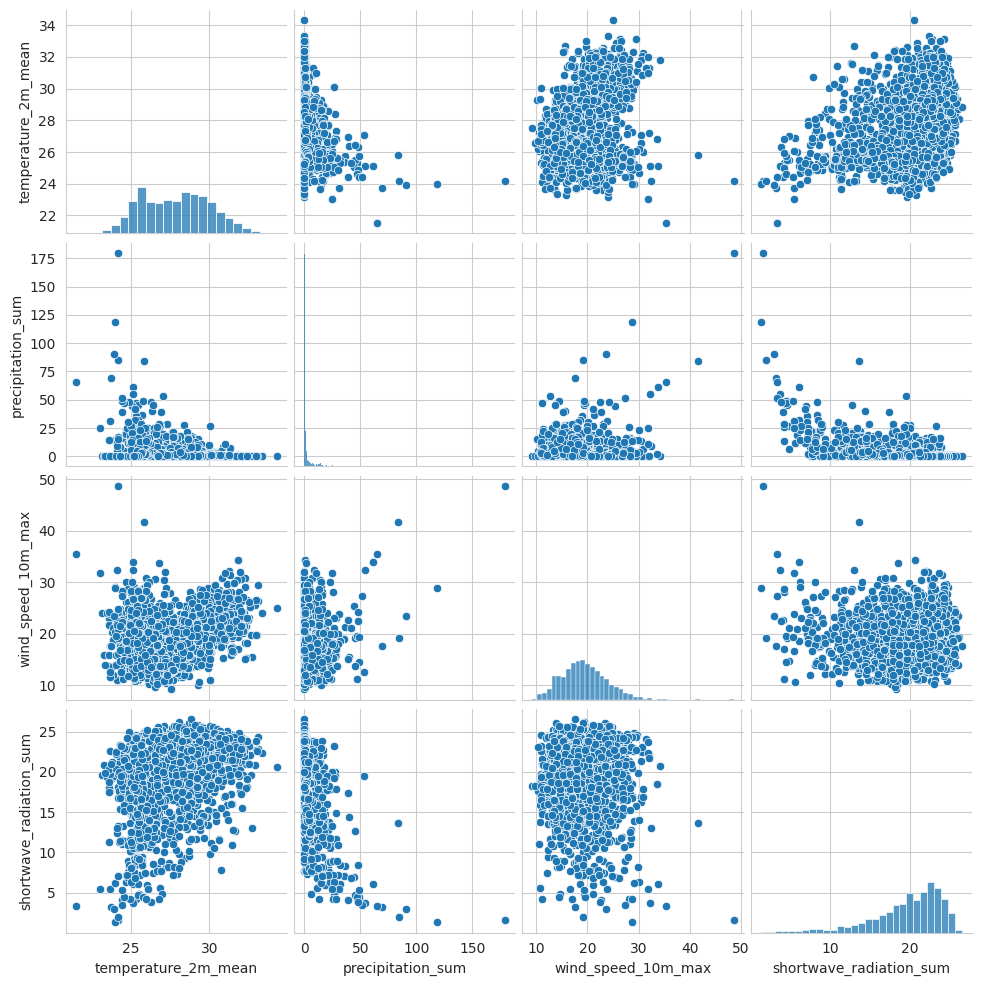

In [54]:
# Custom scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='temperature_2m_mean', y='precipitation_sum', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Precipitation Sum (mm)')
plt.title('Scatter Plot with Regression Line')
plt.show()

# Pairplot to visualize relationships between multiple variables
sns.pairplot(df[['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max', 'shortwave_radiation_sum']])
plt.show()


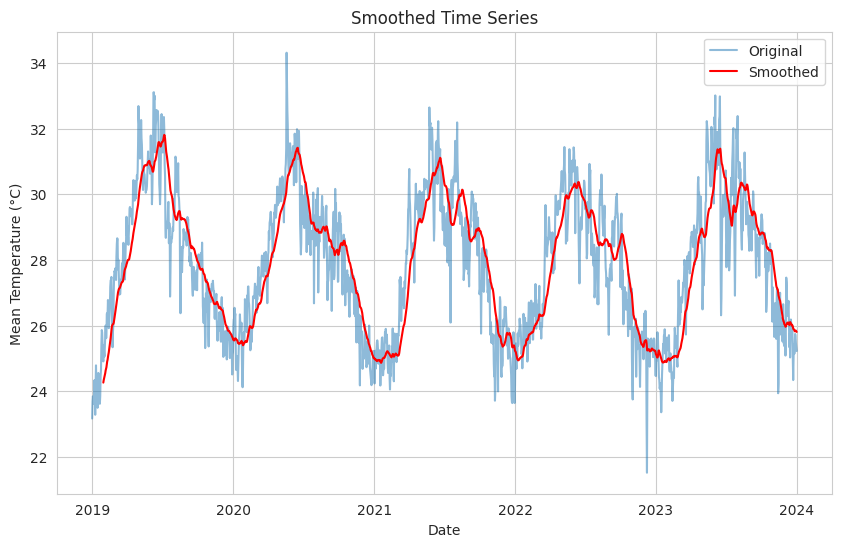

In [55]:
# Moving average smoothing
df['smoothed_temp'] = df['temperature_2m_mean'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Original', alpha=0.5)
plt.plot(df['date'], df['smoothed_temp'], label='Smoothed', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


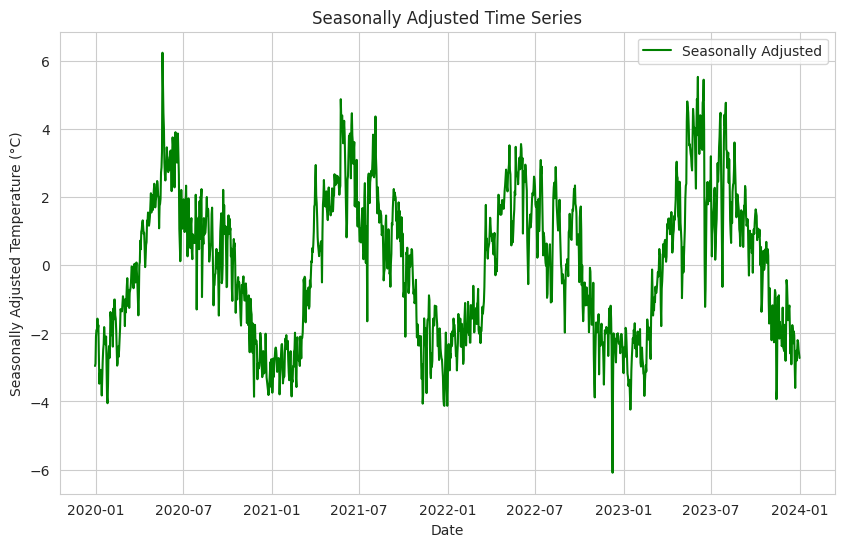

In [56]:
# Seasonal adjustment
seasonal_adjusted = df['temperature_2m_mean'] - df['temperature_2m_mean'].rolling(window=365).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], seasonal_adjusted, label='Seasonally Adjusted', color='green')
plt.xlabel('Date')
plt.ylabel('Seasonally Adjusted Temperature (°C)')
plt.title('Seasonally Adjusted Time Series')
plt.legend()
plt.show()


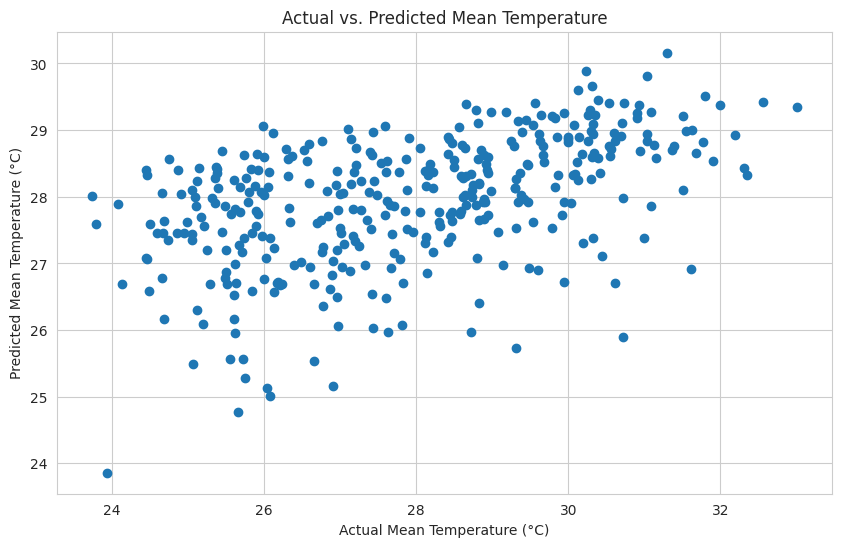

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Predict future temperature using linear regression
X = df[['precipitation_sum', 'wind_speed_10m_max', 'shortwave_radiation_sum']].dropna()
y = df['temperature_2m_mean'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Mean Temperature (°C)')
plt.ylabel('Predicted Mean Temperature (°C)')
plt.title('Actual vs. Predicted Mean Temperature')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



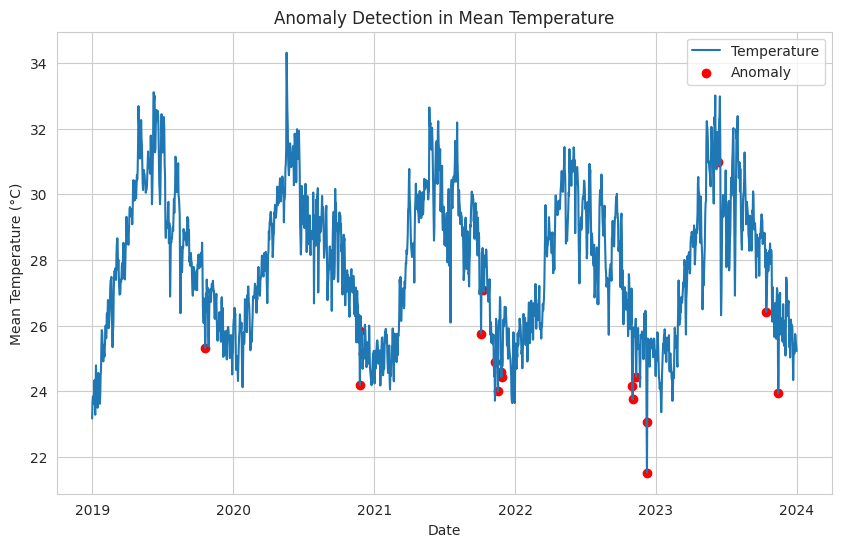

In [58]:
from sklearn.ensemble import IsolationForest

# Anomaly detection using Isolation Forest
clf = IsolationForest(contamination=0.01)
df['anomaly'] = clf.fit_predict(df[['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max']])

# Visualize anomalies
anomalies = df[df['anomaly'] == -1]

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Temperature')
plt.scatter(anomalies['date'], anomalies['temperature_2m_mean'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Anomaly Detection in Mean Temperature')
plt.legend()
plt.show()


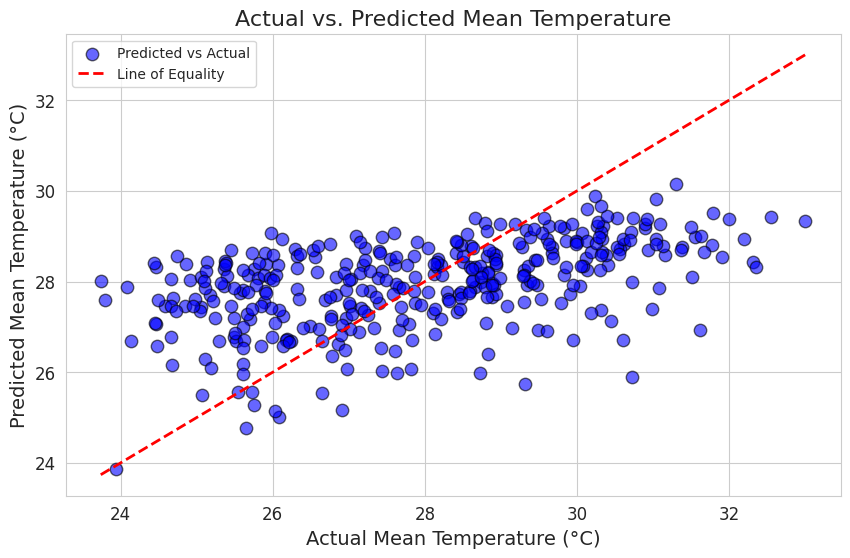

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Predict future temperature using linear regression
X = df[['precipitation_sum', 'wind_speed_10m_max', 'shortwave_radiation_sum']].dropna()
y = df['temperature_2m_mean'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k', s=80, label='Predicted vs Actual')

# Line of equality
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Line of Equality')

# Adding grid, labels, and title
plt.xlabel('Actual Mean Temperature (°C)', fontsize=14)
plt.ylabel('Predicted Mean Temperature (°C)', fontsize=14)
plt.title('Actual vs. Predicted Mean Temperature', fontsize=16)
plt.grid(True)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


In [62]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Predict future temperature using linear regression
X = df[['precipitation_sum', 'wind_speed_10m_max', 'shortwave_radiation_sum']].dropna()
y = df['temperature_2m_mean'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Create the scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test, y=y_pred,
    mode='markers',
    marker=dict(color='blue', size=10, opacity=0.6, line=dict(color='DarkSlateGrey', width=1)),
    name='Predicted vs Actual'
))

# Add line of equality
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

fig.add_trace(go.Scatter(
    x=[min_val, max_val], y=[min_val, max_val],
    mode='lines',
    line=dict(color='red', dash='dash', width=2),
    name='Line of Equality'
))

# Update layout for better aesthetics
fig.update_layout(
    title='Actual vs. Predicted Mean Temperature',
    xaxis_title='Actual Mean Temperature (°C)',
    yaxis_title='Predicted Mean Temperature (°C)',
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    legend=dict(font=dict(size=12)),
    width=1000,
    height=700
)

# Show plot
fig.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



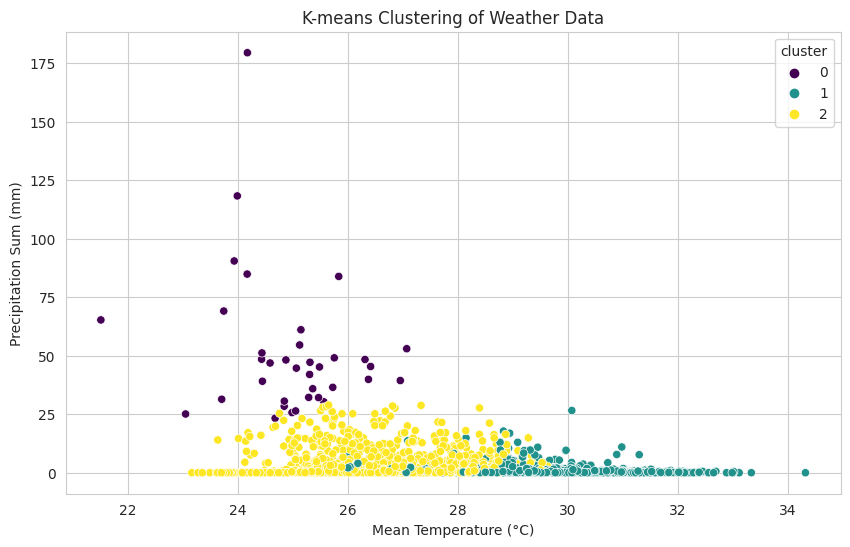

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
X = df[['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_2m_mean', y='precipitation_sum', hue='cluster', data=df, palette='viridis')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Precipitation Sum (mm)')
plt.title('K-means Clustering of Weather Data')
plt.show()


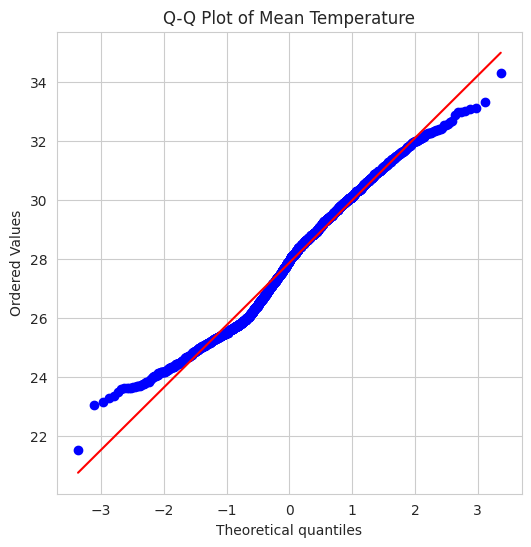

In [67]:
import scipy.stats as stats

# Q-Q plot for mean temperature
plt.figure(figsize=(6, 6))
stats.probplot(df['temperature_2m_mean'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Mean Temperature')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



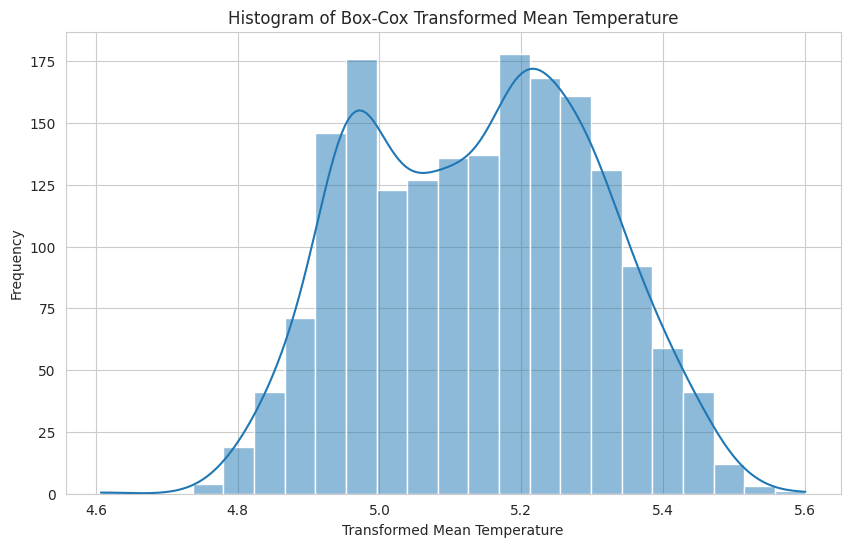

In [68]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
df['temperature_2m_mean_boxcox'], _ = boxcox(df['temperature_2m_mean'].dropna() + 1)  # Add 1 to avoid zero values

# Plot transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature_2m_mean_boxcox'], kde=True)
plt.xlabel('Transformed Mean Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Box-Cox Transformed Mean Temperature')
plt.show()


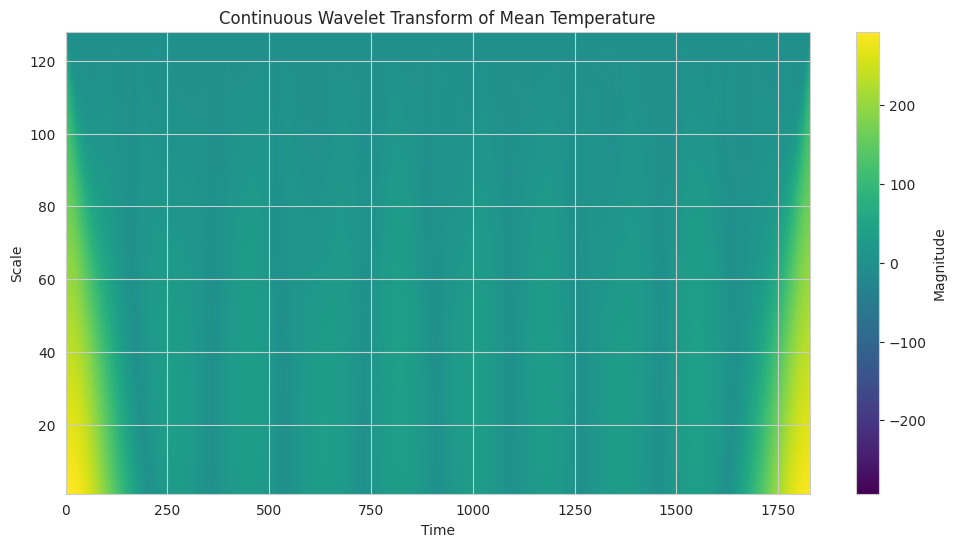

In [69]:
import pywt
import numpy as np

# Perform Continuous Wavelet Transform (CWT)
coef, freqs = pywt.cwt(df['temperature_2m_mean'].dropna(), scales=np.arange(1, 128), wavelet='gaus1')

# Plot the CWT result
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coef), extent=[0, len(df), 1, 128], cmap='viridis', aspect='auto',
           vmax=abs(coef).max(), vmin=-abs(coef).max())
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform of Mean Temperature')
plt.show()


In [71]:
X_scaled

array([[-2.2124617 , -0.38140872,  1.0623891 ],
       [-1.9707923 , -0.38140872,  0.70537215],
       [-1.8944755 , -0.38140872,  0.2316102 ],
       ...,
       [-1.1322876 , -0.33844337,  1.1892182 ],
       [-1.1909927 , -0.32770202,  1.0537469 ],
       [-1.2457842 , -0.38140872,  0.28867707]], dtype=float32)

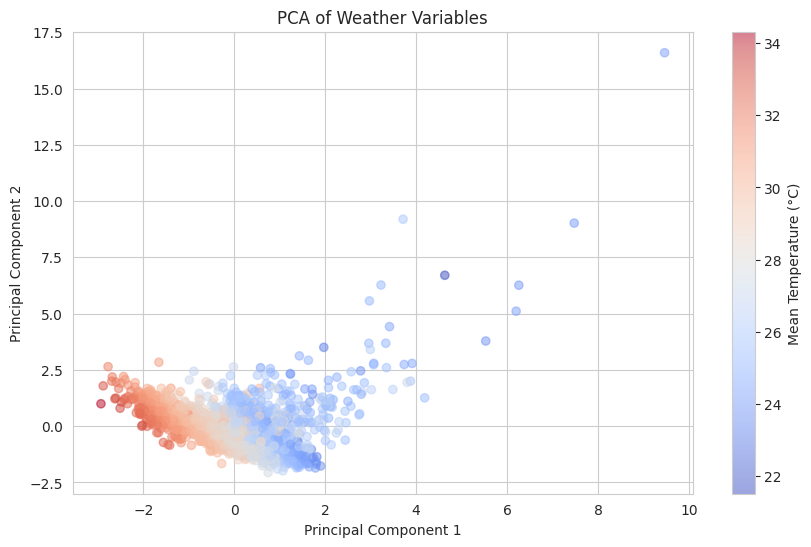

In [70]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['temperature_2m_mean'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Mean Temperature (°C)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Weather Variables')
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1380/1380 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - loss: 0.0081
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


ValueError: x and y must have same first dimension, but have shapes (245,) and (346, 1)

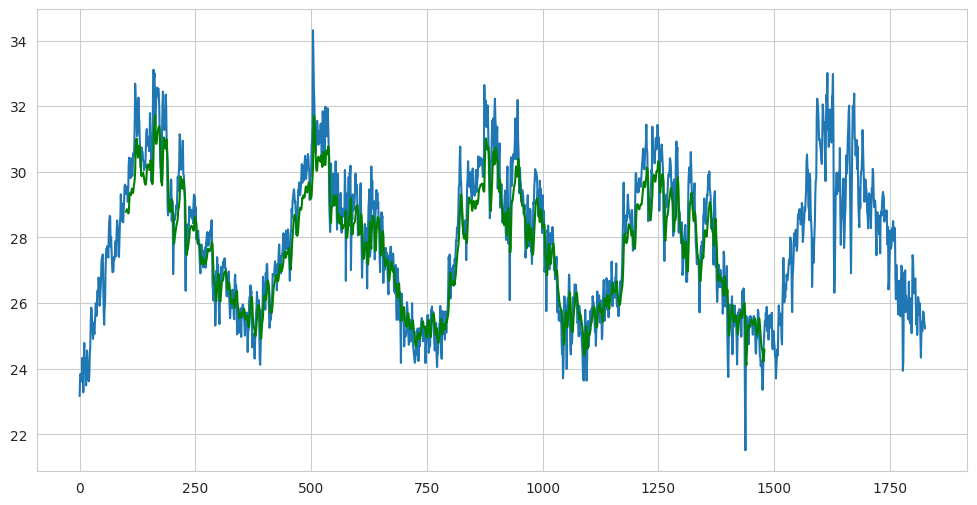

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


# Prepare data for LSTM
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

temp_data = df['temperature_2m_mean'].dropna().values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
temp_data = scaler.fit_transform(temp_data)

time_step = 100
X, y = create_lstm_dataset(temp_data, time_step)

X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]
X_test, y_test = X[int(len(X)*0.8):], y[int(len(y)*0.8):]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(temp_data), label='Original Data')
plt.plot(range(time_step, len(train_predict)+time_step), train_predict, label='Train Predictions', color='green')
plt.plot(range(len(train_predict)+(time_step*2)+1, len(temp_data)-1), test_predict, label='Test Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('LSTM Time Series Forecasting')
plt.legend()
plt.show()


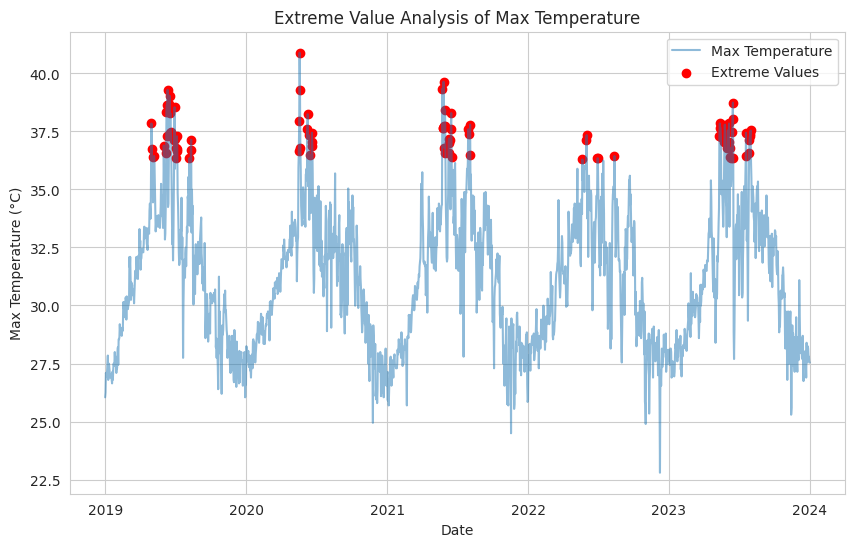

In [74]:
# Identify extreme values
extreme_values = df[df['temperature_2m_max'] > df['temperature_2m_max'].quantile(0.95)]

# Plot extreme values
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature_2m_max'], label='Max Temperature', alpha=0.5)
plt.scatter(extreme_values['date'], extreme_values['temperature_2m_max'], color='red', label='Extreme Values')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.title('Extreme Value Analysis of Max Temperature')
plt.legend()
plt.show()


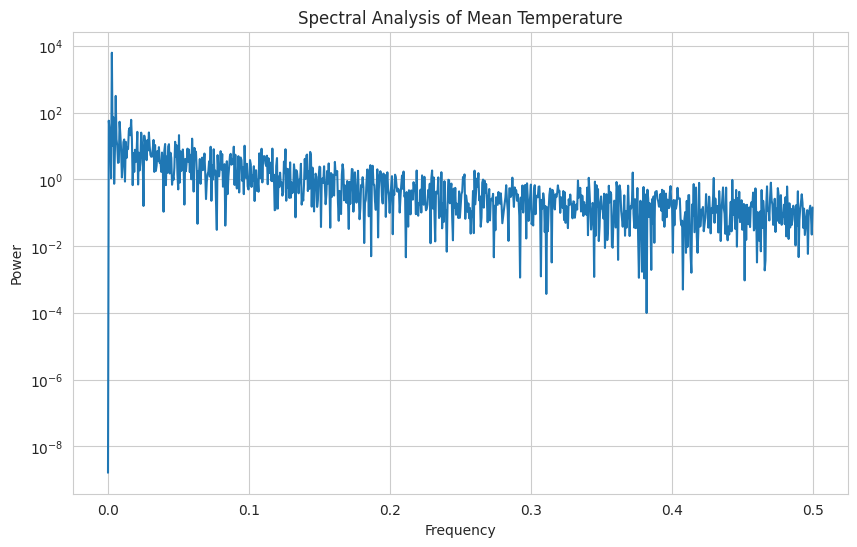

In [75]:
from scipy.signal import periodogram

# Spectral analysis using periodogram
frequencies, power = periodogram(df['temperature_2m_mean'].dropna(), fs=1)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Spectral Analysis of Mean Temperature')
plt.show()


In [77]:
!pip install -q lifelines

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 2.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 5.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=c42eca9011d5b71df26e5a170225ca520c75794748cf2462fc1a36d11108f982
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


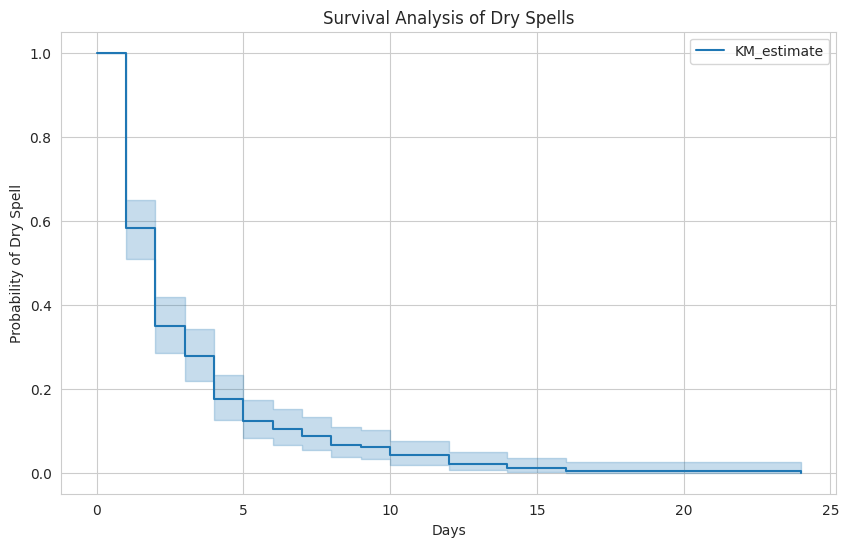

In [78]:
from lifelines import KaplanMeierFitter

# Survival analysis example: Duration of dry spells
df['dry_spell'] = df['precipitation_sum'] == 0
df['duration'] = (df['dry_spell'] != df['dry_spell'].shift()).cumsum()
dry_spells = df[df['dry_spell']].groupby('duration')['dry_spell'].count()

kmf = KaplanMeierFitter()
kmf.fit(durations=dry_spells, event_observed=[True]*len(dry_spells))

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.xlabel('Days')
plt.ylabel('Probability of Dry Spell')
plt.title('Survival Analysis of Dry Spells')
plt.show()


In [79]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Prepare data
data = df[['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max']].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define autoencoder
input_dim = data_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="linear")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Anomaly detection
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

df['anomaly_autoencoder'] = anomalies

# Plot anomalies
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Temperature')
plt.scatter(df['date'][df['anomaly_autoencoder']], df['temperature_2m_mean'][df['anomaly_autoencoder']], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Anomaly Detection Using Autoencoder')
plt.legend()
plt.show()


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9252 - val_loss: 0.7147
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9145 - val_loss: 0.6755
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7871 - val_loss: 0.6404
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1094 - val_loss: 0.6114
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9114 - val_loss: 0.5857
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8849 - val_loss: 0.5625
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6460 - val_loss: 0.5400
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7230 - val_loss: 0.5180
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6131 - val_loss: 0.4986
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6113 - val_loss: 0.4799
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6741 - val_loss: 0.4618
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5638 - val_lo

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



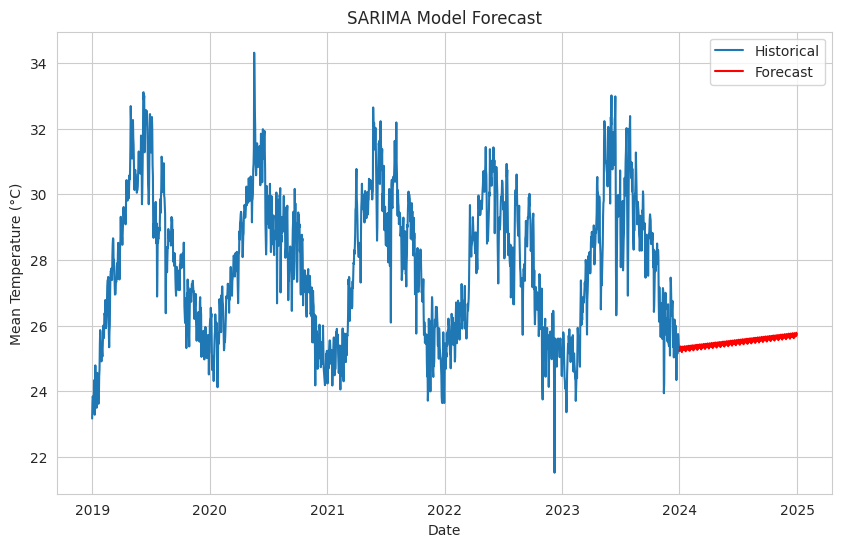

In [80]:
import statsmodels.api as sm

# Prepare data for SARIMA
temp_data = df.set_index('date')['temperature_2m_mean'].dropna()
temp_data.index = pd.to_datetime(temp_data.index)

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(temp_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast future values
forecast = sarima_fit.forecast(steps=365)

# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(temp_data, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()


In [81]:
from statsmodels.tsa.stattools import grangercausalitytests

# Check if temperature can be predicted by precipitation
gc_test_result = grangercausalitytests(df[['temperature_2m_mean', 'precipitation_sum']].dropna(), maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.1050 , p=0.0001  , df_denom=1823, df_num=1
ssr based chi2 test:   chi2=16.1316 , p=0.0001  , df=1
likelihood ratio test: chi2=16.0607 , p=0.0001  , df=1
parameter F test:         F=16.1050 , p=0.0001  , df_denom=1823, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.6681 , p=0.0000  , df_denom=1820, df_num=2
ssr based chi2 test:   chi2=25.4059 , p=0.0000  , df=2
likelihood ratio test: chi2=25.2307 , p=0.0000  , df=2
parameter F test:         F=12.6681 , p=0.0000  , df_denom=1820, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.5914  , p=0.0008  , df_denom=1817, df_num=3
ssr based chi2 test:   chi2=16.8388 , p=0.0008  , df=3
likelihood ratio test: chi2=16.7615 , p=0.0008  , df=3
parameter F test:         F=5.5914  , p=0.0008  , df_denom=1817, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4304  , p=0.

In [84]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['temperature_2m_mean'].dropna(), order=(5,1,0))
fit = model.fit()

# Forecast the future values
forecast = fit.forecast(steps=365)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temperature_2m_mean'], label='Original')
plt.plot(pd.date_range(df['date'].iloc[-1], periods=365, freq='D'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [86]:
!pip install -q dtaidistance

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



In [87]:
from dtaidistance import dtw

# Compute DTW distance
series1 = df['temperature_2m_mean'].dropna().values
series2 = df['precipitation_sum'].dropna().values[:len(series1)]  # Ensure same length

distance = dtw.distance(series1, series2)
print('DTW distance:', distance)


DTW distance: 885.9374229781921


In [91]:
# Example: Creating lag features
df['temp_lag_1'] = df['temperature_2m_mean'].shift(1)
df['temp_lag_2'] = df['temperature_2m_mean'].shift(2)
df['temp_lag_3'] = df['temperature_2m_mean'].shift(3)

# Example: Rolling statistics
df['temp_roll_mean_7'] = df['temperature_2m_mean'].rolling(window=7).mean()
df['temp_roll_std_7'] = df['temperature_2m_mean'].rolling(window=7).std()


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your dataframe with daily weather data
# We will use previous day's weather to predict the next day's weather code
df['prev_weather_code'] = df['weather_code'].shift(1)

# Drop the first row since it won't have a previous day's weather code
df = df.dropna()

# Prepare features and target
X = df[['temperature_2m_max', 'temperature_2m_min', 'wind_speed_10m_max', 'prev_weather_code']]
y = df['weather_code']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can now use this trained model to predict the weather code for future dates
# Just prepare your features similarly and use clf.predict()


Accuracy: 0.362116991643454
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_de

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = df[['temperature_2m_max', 'temperature_2m_min', 'wind_speed_10m_max', 'prev_weather_code']]
y = df['weather_code']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.37047353760445684
